# Business Question¶
This analysis aims to address the following key business questions:

**Sales Performance**:
 * What are the overall sales trends, and how have they evolved over time? Are there any significant fluctuations that need to be addressed?
 
**Product Categories**: 
 * Which product categories contributed the most to the company's sales? Which categories are underperforming, if any?
 
**Geographic Insights**: 
 * How does sales performance vary across the regions? Are there promising geographical regions or areas requiring improved marketing?
 
**Profitability**: 
 * Which products are more profitable and which were not? With the available data, what factors affected the company's profit? How is the company's profitability during the period?


This analysis also aims to discover other valuable insights about the dataset. Ultimately, this analysis intends to provide actionable insights to guide decision-making and enhance overall business performance.

## Key Findings
Summarized below are the key findings from this analysis. Throughout the 4-year period from 2011 to 2014:

**Sales Performance**

* Superstore sales increased yearly, with the fastest growth in 2013 and the slowest in 2012.
* Seasonal sales trends was observed, notably in November, December, and September.
* Sales exhibited high variability, particularly in March, September, and October.

**Product Categories**

* Phones, chairs, and storage products led in sales by category, while copiers, furnishings, and fasteners performed least.
* No clear sales pattern emerged for product sub-categories.
* Supplies (technology), copiers, and appliances experienced the highest average annual sales growth, while envelopes, chairs, and machine products grew the slowest.

**Geographical Insights**

* Seasonal trends were consistent in all regions, with higher sales in the West and East.
* Sales varied among regions, with office supplies and technology products excelling in the West and East.
* Most regions had negative growth in 2012, except for Central region.
* The West had the fastest average annual growth rate, followed by East, Central, and the South.

**Profitability**

* The company maintained a profit margin above 10%, decreasing slightly in 2014.
* Furnishings, copiers, and labels were the most profitable sub-categories, while chairs, phones, and storage products were the least profitable.
* Phones, chairs, and binders generated the highest total profit, while machines, bookcases, and fasteners generated the least.
* Discounts significantly affected profits, with tables, office supplies, and bookcases experiencing the largest drops.
* Chairs were highly profitable in the furniture category, with copiers showing impressive profit growth. Machine products, on the other hand, had stagnant growth.
* Orders with discounts did not significantly differ in sales or profit compared to non-discounted orders. High discounts did not correlate with higher sales or profits.

# EDA

In [89]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy.stats import spearmanr
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,cross_val_score
from sklearn.preprocessing import  StandardScaler,RobustScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, PowerTransformer
from scipy.stats import probplot
import gc

In [90]:
data = pd.read_csv(r"D:\SIC\Materials& Tasks\Superstore Sales\Superstore.csv", encoding="latin1")

In [91]:
df = data.copy()

In [92]:
df.head()

Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2013-152156  09-11-2013  12-11-2013    Second Class    CG-12520   
1       2  CA-2013-152156  09-11-2013  12-11-2013    Second Class    CG-12520   
2       3  CA-2013-138688  13-06-2013  17-06-2013    Second Class    DV-13045   
3       4  US-2012-108966  11-10-2012  18-10-2012  Standard Class    SO-20335   
4       5  US-2012-108966  11-10-2012  18-10-2012  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10001798        Furniture    Bookcases   
1       42420   South  FUR-CH-10000454        Furniture       Chairs   
2       90036    West  OFF-LA-10000240  Office Supplies       Labels   
3       33311   South  FUR-TA-10000577        Furniture       Tables   
4       33311   South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
4                     Eldon Fold 'N Roll Cart System   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164  

[5 rows x 21 columns]

In [93]:
df.shape

(9994, 21)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

## Drop useless columns 

In [95]:
df.drop(["Row ID","Order ID","Customer ID","Customer Name","Postal Code","Country","Product ID","Product Name"],axis=1,inplace=True)

In [96]:
df.describe()

Sales     Quantity     Discount       Profit
count   9994.000000  9994.000000  9994.000000  9994.000000
mean     229.858001     3.789574     0.156203    28.656896
std      623.245101     2.225110     0.206452   234.260108
min        0.444000     1.000000     0.000000 -6599.978000
25%       17.280000     2.000000     0.000000     1.728750
50%       54.490000     3.000000     0.200000     8.666500
75%      209.940000     5.000000     0.200000    29.364000
max    22638.480000    14.000000     0.800000  8399.976000

In [97]:
df.nunique()/len(df)

Order Date      0.123874
Ship Date       0.133480
Ship Mode       0.000400
Segment         0.000300
City            0.053132
State           0.004903
Region          0.000400
Category        0.000300
Sub-Category    0.001701
Sales           0.582850
Quantity        0.001401
Discount        0.001201
Profit          0.729137
dtype: float64

In [98]:
null_counts = df.isnull().sum()
null_percentages = (null_counts / len(df)) * 100
null_summary = pd.DataFrame({
    'Null Count': null_counts,
    'Null Percentage': null_percentages
})

null_summary = null_summary.style.format({
    'Null Count': '{:.0f}',
    'Null Percentage': '{:.2f}%'
}).background_gradient(cmap='coolwarm')

null_summary

* No nulls

In [99]:
df.duplicated().sum()

1

In [100]:
df.drop_duplicates(inplace=True)

In [101]:
# data conversion
df['Order Date']=pd.to_datetime(df['Order Date'],format='%d-%m-%Y')
df['Ship Date']=pd.to_datetime(df['Ship Date'],format='%d-%m-%Y')

In [102]:
df['Order Date'] 

0      2013-11-09
1      2013-11-09
2      2013-06-13
3      2012-10-11
4      2012-10-11
          ...    
9989   2011-01-22
9990   2014-02-27
9991   2014-02-27
9992   2014-02-27
9993   2014-05-05
Name: Order Date, Length: 9993, dtype: datetime64[ns]

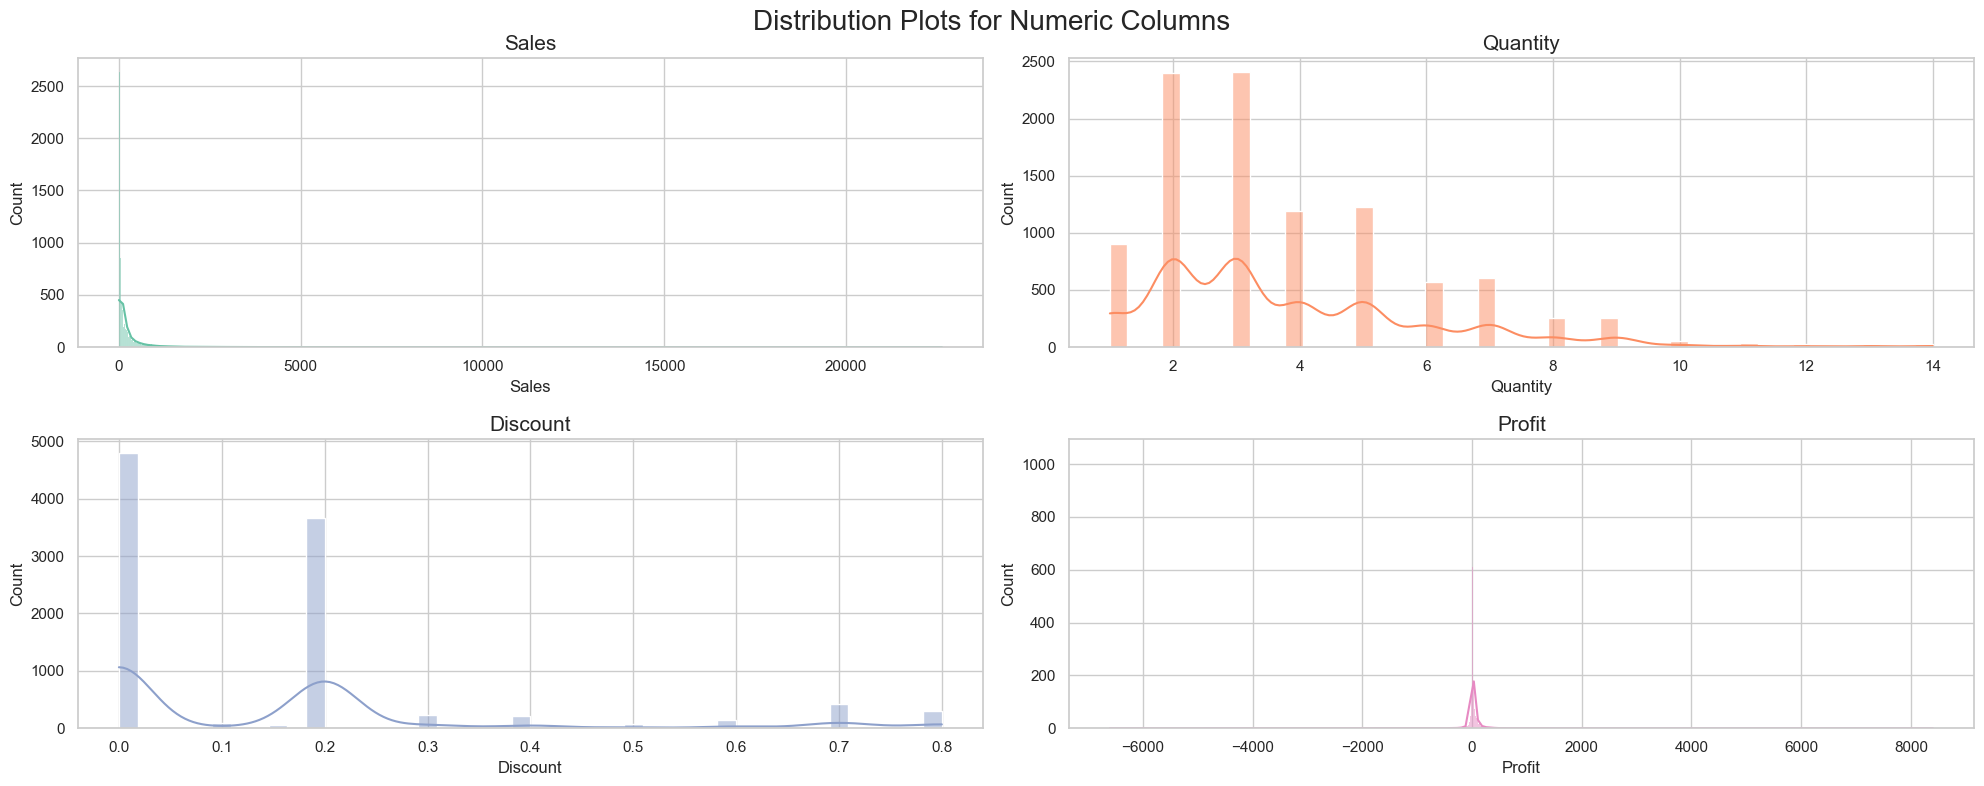

In [103]:
columns_to_plot = df.select_dtypes(include='number').columns

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 8))
fig.suptitle("Distribution Plots for Numeric Columns", fontsize=20)
palette = sns.color_palette("Set2", len(columns_to_plot))

for i, (column, color) in enumerate(zip(columns_to_plot, palette)):
    row = i // 2
    col = i % 2
    sns.histplot(df[column], kde=True, color=color, ax=axes[row, col])
    axes[row, col].set_title(column, fontsize=15)

plt.tight_layout()
plt.subplots_adjust(top=0.92)

plt.show()

## Outliers 

In [104]:
numeric_cols = df.select_dtypes(include='number').columns

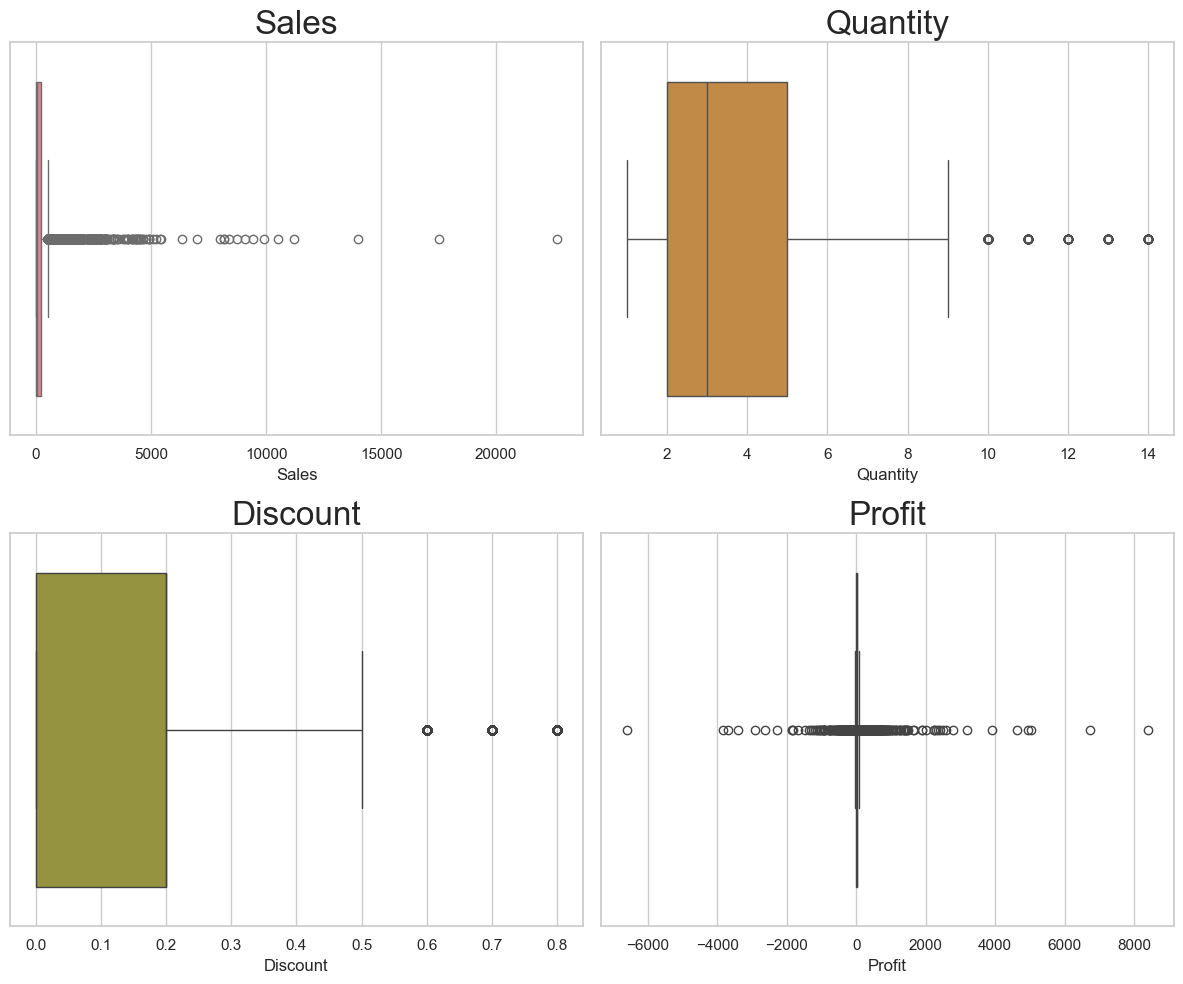

In [105]:
rows, cols = 2, 2
custom_palette = sns.color_palette("husl", n_colors=9)

fig, axes = plt.subplots(rows, cols, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    if i < len(axes):
        sns.boxplot(x=df[col], ax=axes[i], color=custom_palette[i % len(custom_palette)])
        axes[i].set_title(col, fontsize=24)

plt.tight_layout()
plt.show()


* We can't consider it as outliers and drop it as it's real data

## Heatmap

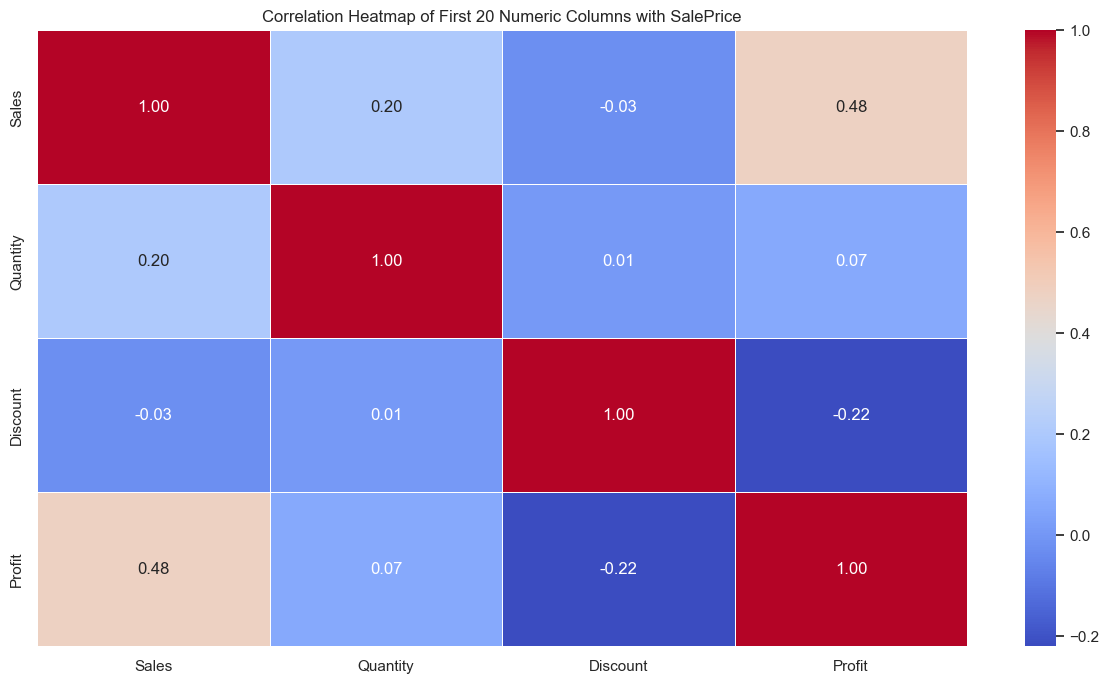

In [106]:
numeric_cols = df.select_dtypes(include='number').columns
first_20_numeric_cols = numeric_cols

cols_to_include = first_20_numeric_cols.tolist() 

corr_matrix = df[cols_to_include].corr()

plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of First 20 Numeric Columns with SalePrice')
plt.show()


* Profit is highly correlated with sales.

## Categorical Features

In [107]:
categorical_features = df.select_dtypes(include='object').columns
for column in categorical_features:
    if df[column].isnull().any():
        null_count = df[column].isnull().sum()
        null_percentage = (null_count / len(df)) * 100
        print(f"'{column}' has {null_count} null values ({null_percentage:.2f}%).")

* No nulls in categorical columns

In [108]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def cat_summary(dataframe, col_name):
    counts = dataframe[col_name].value_counts()
    ratios = 100 * counts / len(dataframe)

    fig = make_subplots(rows=1, cols=2, subplot_titles=[
        f'{col_name} Frequency',
        f'Sales vs {col_name}'
    ])

    fig.add_trace(go.Bar(
        x=counts.index,
        y=counts.values,
        text=[f'{ratio:.2f}%' for ratio in ratios],
        textposition='auto',
        marker_color=px.colors.qualitative.Plotly
    ), row=1, col=1)

    saleprice_box = px.box(dataframe, x=col_name, y='Sales', color=col_name)
    fig.add_traces(saleprice_box.data, rows=[1]*len(saleprice_box.data), cols=[2]*len(saleprice_box.data))

    fig.update_layout(
        title_text=f'Summary for {col_name}',
        showlegend=False,
        width=1100,
        height=600,
        title_x=0.5
    )

    fig.show()


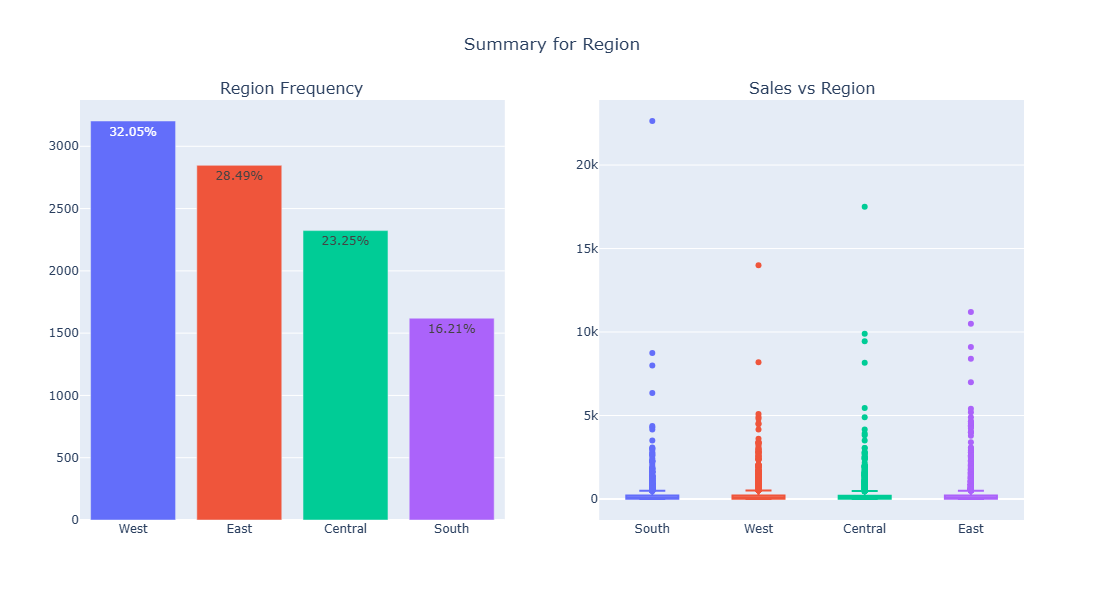

In [109]:
cat_summary(df, "Region")

* West Region has the highest sales percentage 

C:\Users\SHENDY LINK\AppData\Local\Temp\ipykernel_7608\2849938250.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\SHENDY LINK\AppData\Local\Temp\ipykernel_7608\2849938250.py:7: UserWarning:


The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.

C:\Users\SHENDY LINK\AppData\Local\Temp\ipykernel_7608\2849938250.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\SHENDY LINK\AppData\Local\Temp\ipykernel_7608\2849938250.py:12: UserWarning:


The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.



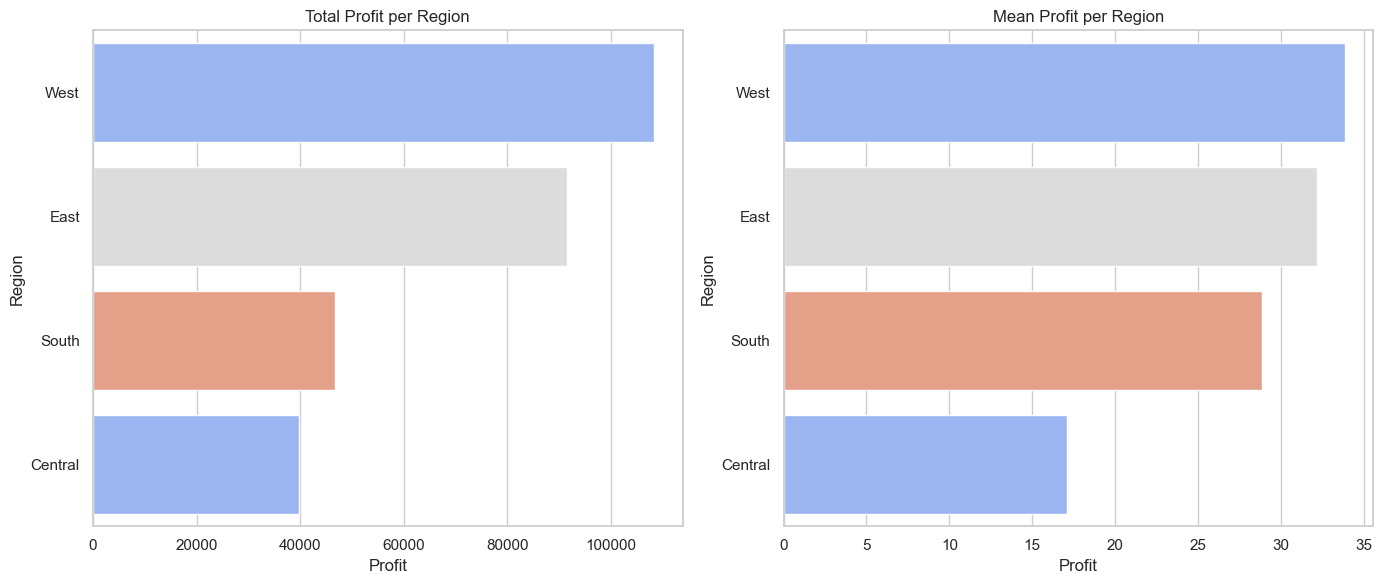

In [110]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

palette = sns.color_palette("coolwarm", 3)

# Total Profit per Region
df_sales_total = pd.DataFrame(df.groupby(['Region'])['Profit'].sum()).reset_index().sort_values('Profit', ascending=False)
sns.barplot(x='Profit', y='Region', data=df_sales_total, palette=palette, ax=axes[0])
axes[0].set_title('Total Profit per Region')

# Mean Profit per Region
df_sales_mean = pd.DataFrame(df.groupby(['Region'])['Profit'].mean()).reset_index().sort_values('Profit', ascending=False)
sns.barplot(x='Profit', y='Region', data=df_sales_mean, palette=palette, ax=axes[1])
axes[1].set_title('Mean Profit per Region')

plt.tight_layout()
plt.show()

* West Region has the highest total and mean profit. 

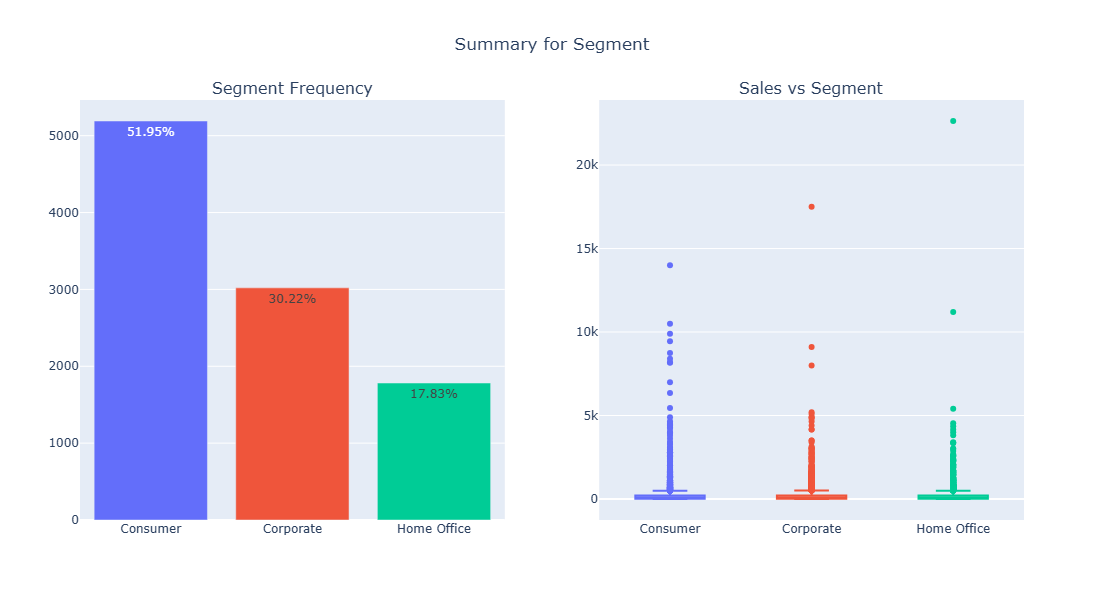

In [111]:
cat_summary(df, "Segment")

* Consumers have the higher sales perecnetage 

C:\Users\SHENDY LINK\AppData\Local\Temp\ipykernel_7608\1059803142.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\SHENDY LINK\AppData\Local\Temp\ipykernel_7608\1059803142.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




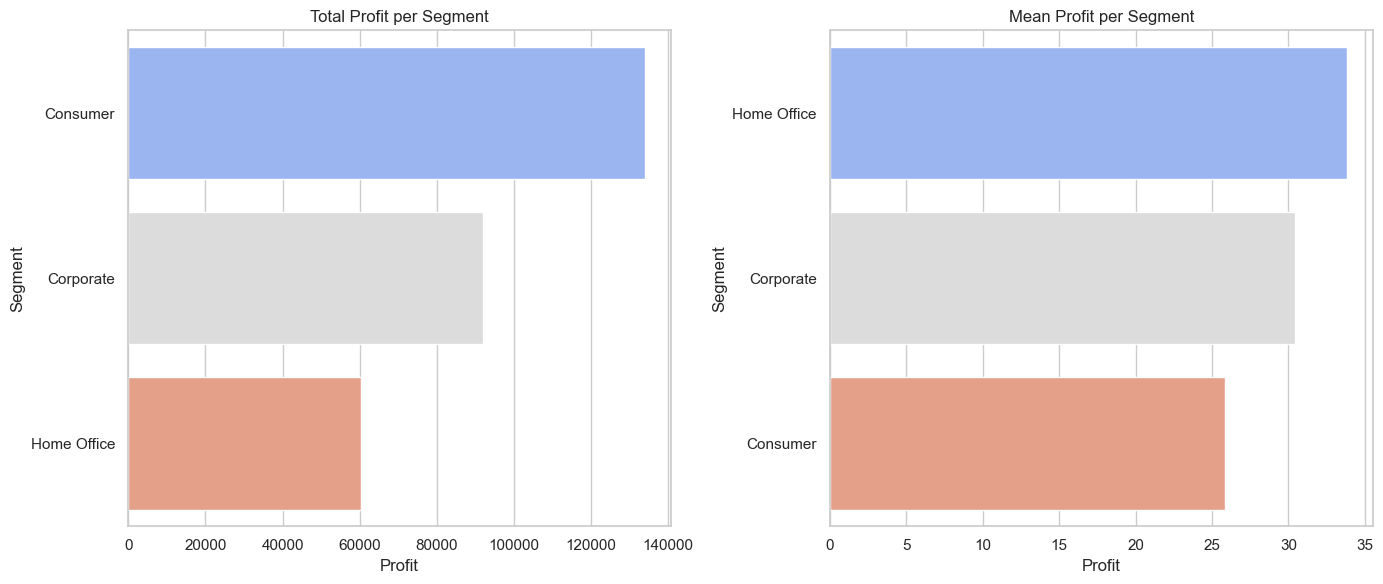

In [112]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

palette = sns.color_palette("coolwarm", 3)

# Total Profit per Segment
df_sales_total = pd.DataFrame(df.groupby(['Segment'])['Profit'].sum()).reset_index().sort_values('Profit', ascending=False)
sns.barplot(x='Profit', y='Segment', data=df_sales_total, palette=palette, ax=axes[0])
axes[0].set_title('Total Profit per Segment')

# Mean Profit per Segment
df_sales_mean = pd.DataFrame(df.groupby(['Segment'])['Profit'].mean()).reset_index().sort_values('Profit', ascending=False)
sns.barplot(x='Profit', y='Segment', data=df_sales_mean, palette=palette, ax=axes[1])
axes[1].set_title('Mean Profit per Segment')

plt.tight_layout()
plt.show()

* Total profit helps identify which segment contributes the most or least to overall profitability.
* Mean profit is useful for understanding the profitability efficiency of a segment. A segment with a high mean profit but a low total profit might indicate fewer but more profitable transactions.

- Consumer contributes the most to overall profitability.
- Home Office has the highest mean profit.

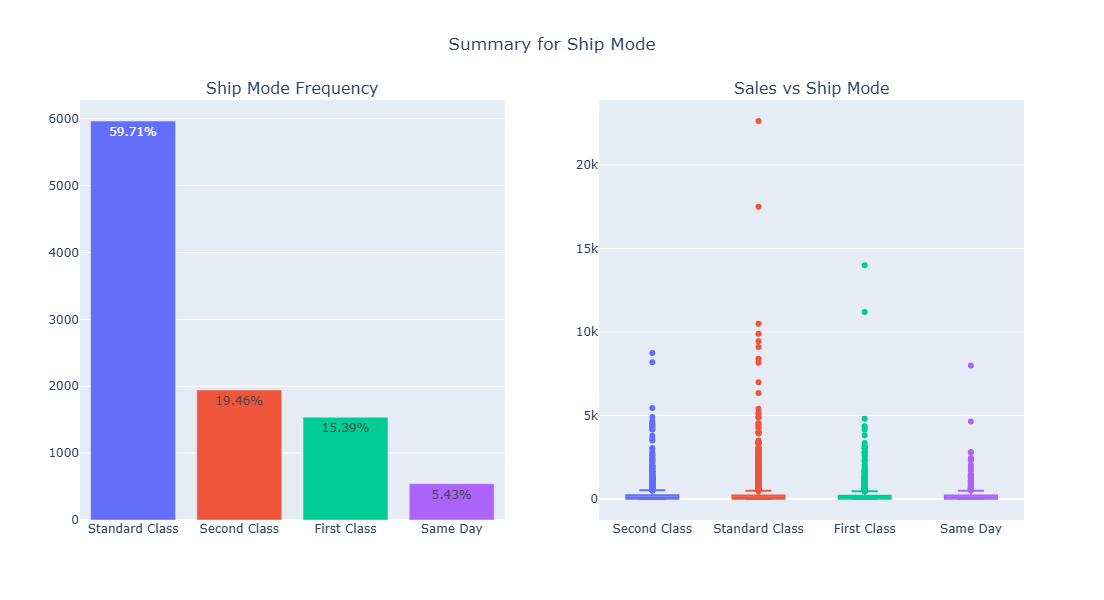

In [113]:
cat_summary(df, "Ship Mode")

C:\Users\SHENDY LINK\AppData\Local\Temp\ipykernel_7608\2597022238.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\SHENDY LINK\AppData\Local\Temp\ipykernel_7608\2597022238.py:7: UserWarning:


The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.

C:\Users\SHENDY LINK\AppData\Local\Temp\ipykernel_7608\2597022238.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\SHENDY LINK\AppData\Local\Temp\ipykernel_7608\2597022238.py:12: UserWarning:


The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.



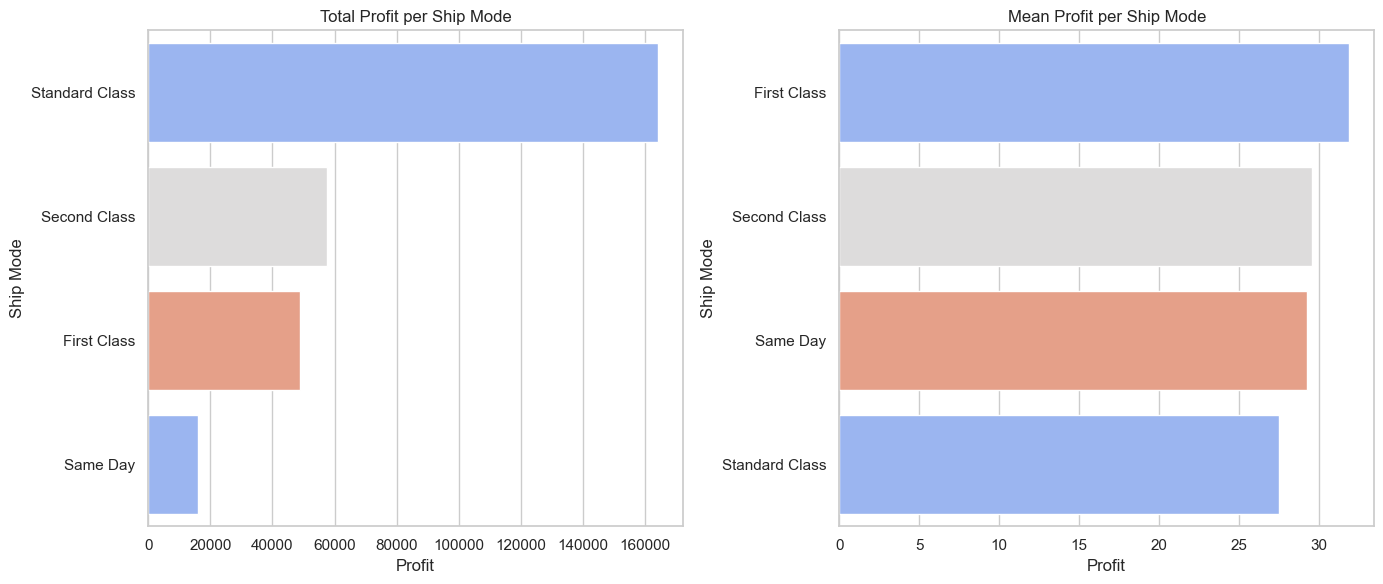

In [114]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

palette = sns.color_palette("coolwarm", 3)

# Total Profit per Ship Mode
df_sales_total = pd.DataFrame(df.groupby(['Ship Mode'])['Profit'].sum()).reset_index().sort_values('Profit', ascending=False)
sns.barplot(x='Profit', y='Ship Mode', data=df_sales_total, palette=palette, ax=axes[0])
axes[0].set_title('Total Profit per Ship Mode')

# Mean Profit per Ship Mode
df_sales_mean = pd.DataFrame(df.groupby(['Ship Mode'])['Profit'].mean()).reset_index().sort_values('Profit', ascending=False)
sns.barplot(x='Profit', y='Ship Mode', data=df_sales_mean, palette=palette, ax=axes[1])
axes[1].set_title('Mean Profit per Ship Mode')

plt.tight_layout()
plt.show()

* Standard class has the highest total profit.
* First class has the highest mean of profit.

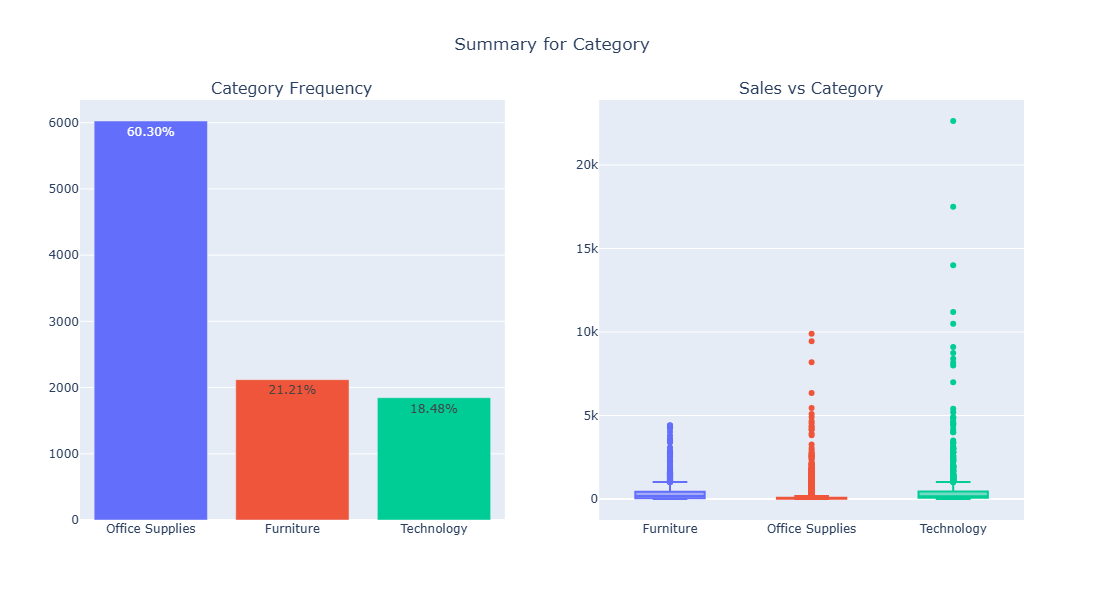

In [115]:
cat_summary(df, "Category")

* Most saled category is Office supplies, but technology is the highest in price

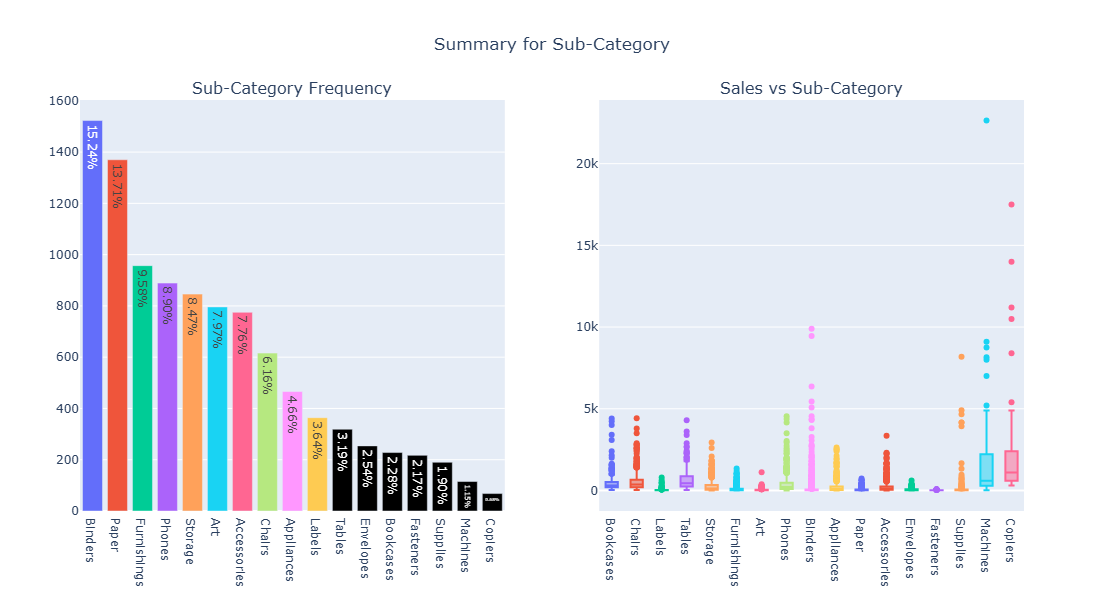

In [116]:
cat_summary(df, "Sub-Category")

* Binders are the most saled sub-category, copiers and machines the highest in price

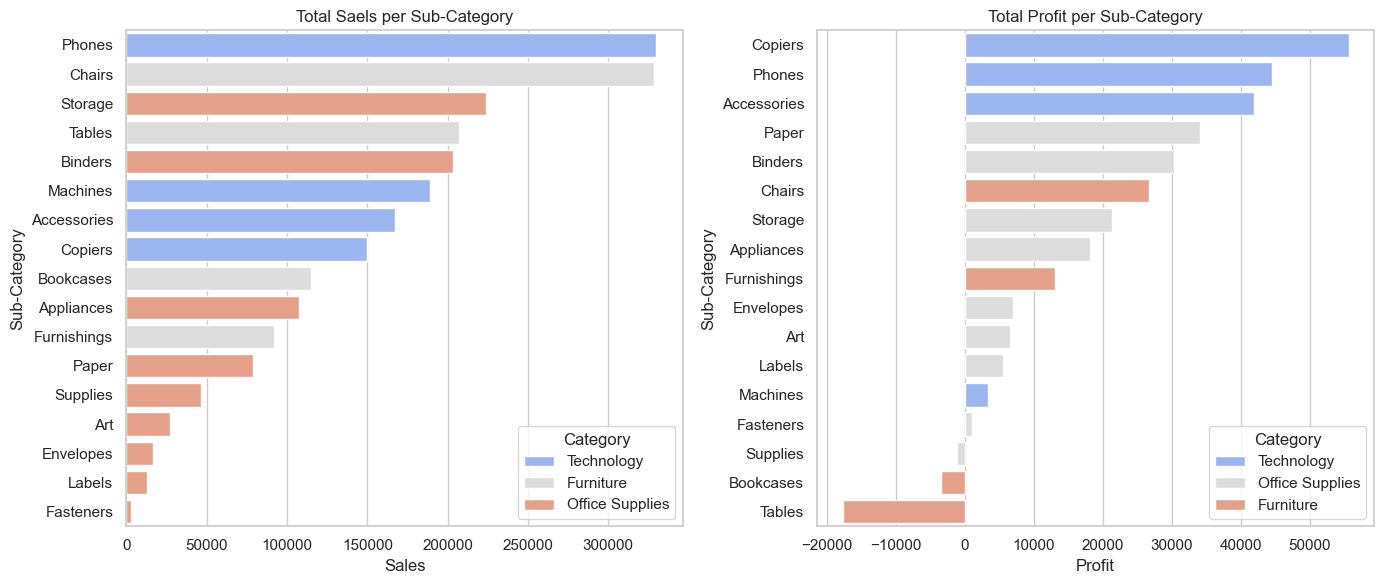

In [117]:

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

palette = sns.color_palette("coolwarm", 3)

# Total Profit per Sub-Category
df_sales=pd.DataFrame(df.groupby(['Category','Sub-Category'])['Sales'].sum()).reset_index().sort_values('Sales',ascending=False)

sns.barplot(x='Sales',y='Sub-Category',data=df_sales,hue='Category',palette=palette, ax=axes[0])
axes[0].set_title('Total Saels per Sub-Category')

# Total Profit per Sub-Category
df_sales=pd.DataFrame(df.groupby(['Category','Sub-Category'])['Profit'].sum()).reset_index().sort_values('Profit',ascending=False)

sns.barplot(x='Profit',y='Sub-Category',data=df_sales,hue='Category',palette=palette, ax=axes[1])
axes[1].set_title('Total Profit per Sub-Category')

plt.tight_layout()
plt.show()



* Phones is the highest sub-category in total sales 


* Copiers is the highest profitable sub-category.
* Technology is the highest profitable category.
* We can find that there is Negative profit value in tables.  

<Axes: xlabel='City'>

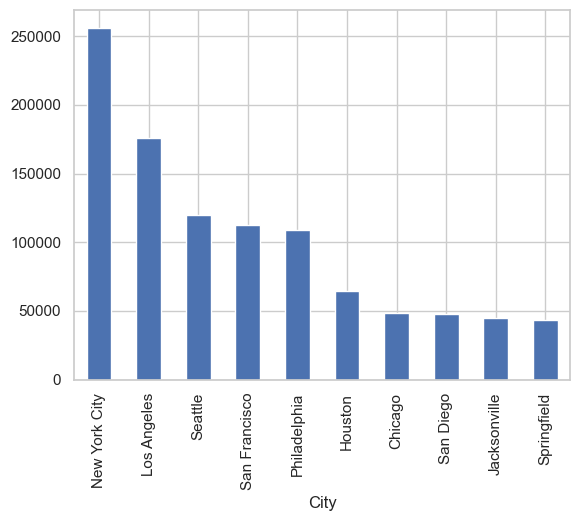

In [118]:
df.groupby('City')['Sales'].sum().nlargest(10).plot(kind='bar')


* We can find that highest sales is in NYC.

<Axes: xlabel='City'>

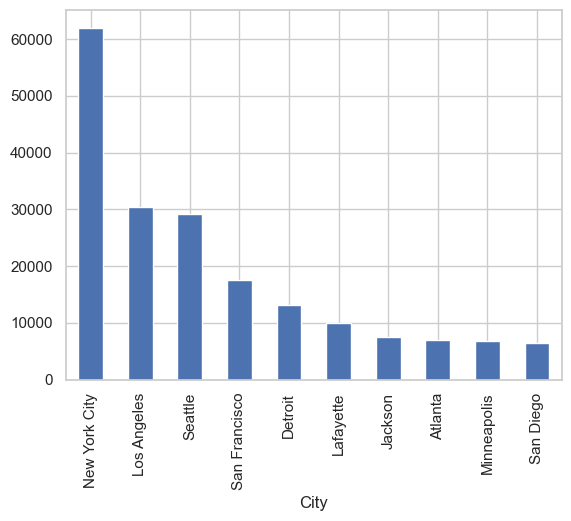

In [119]:
df.groupby('City')['Profit'].sum().nlargest(10).plot(kind='bar')


<Axes: xlabel='City'>

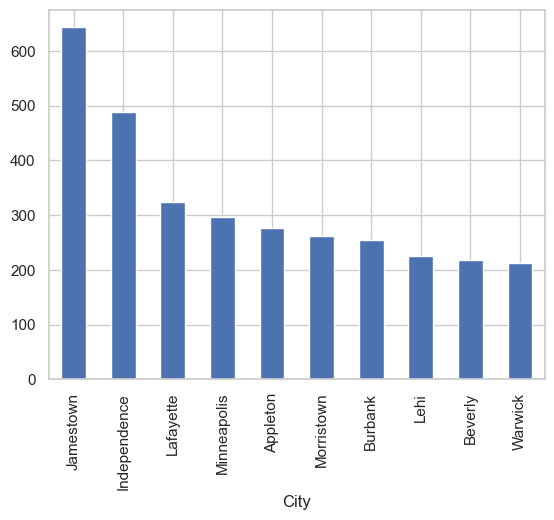

In [120]:
df.groupby('City')['Profit'].mean().nlargest(10).plot(kind='bar')


* Jamestown has the highest mean profit

## Effect of Discounts on Profit and Sales


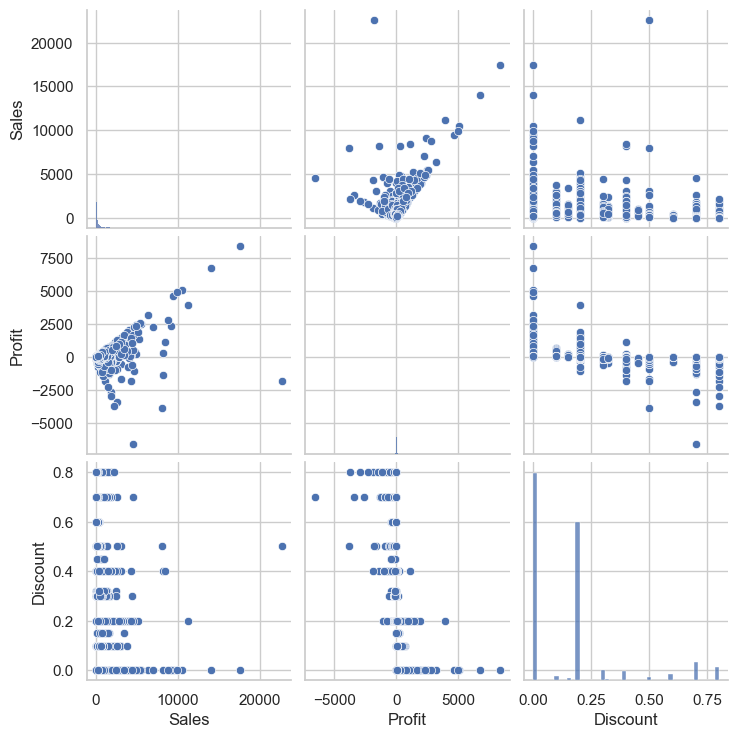

In [121]:
sns.pairplot(df[['Sales', 'Profit', 'Discount']])


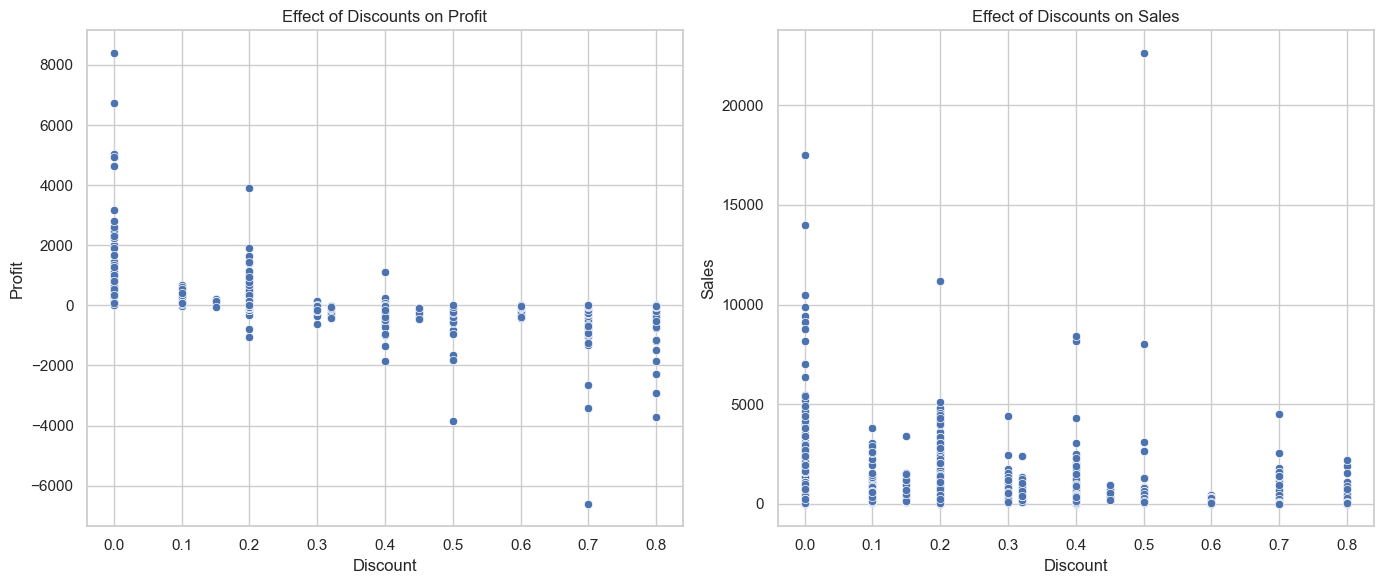

In [122]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Scatter plot for discount vs profit
sns.scatterplot(x='Discount', y='Profit', data=df, ax=axes[0])
axes[0].set_title('Effect of Discounts on Profit')

# Scatter plot for discount vs sales
sns.scatterplot(x='Discount', y='Sales', data=df,ax=axes[1])
axes[1].set_title('Effect of Discounts on Sales')


plt.tight_layout()
plt.show()



1. Discount is More on Lower-Priced Items
2. As Discount Increases, Profit Decreases


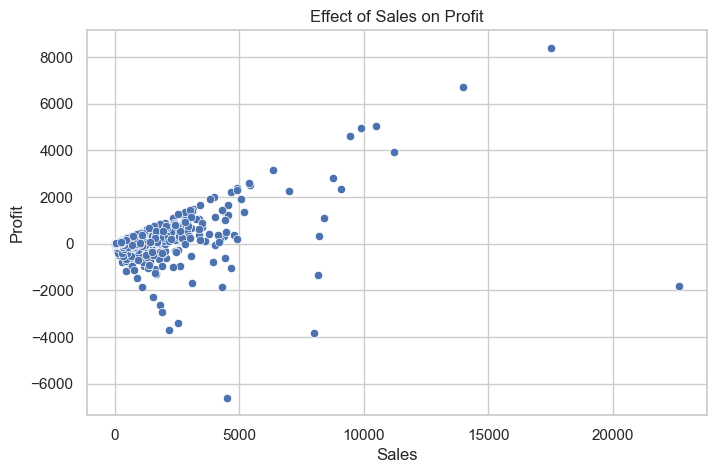

In [123]:
# Scatter plot for sales vs profit
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Sales', y='Profit', data=df)
plt.title('Effect of Sales on Profit')
plt.show()


* As Sales increase, Profit increases

## Time Analysis

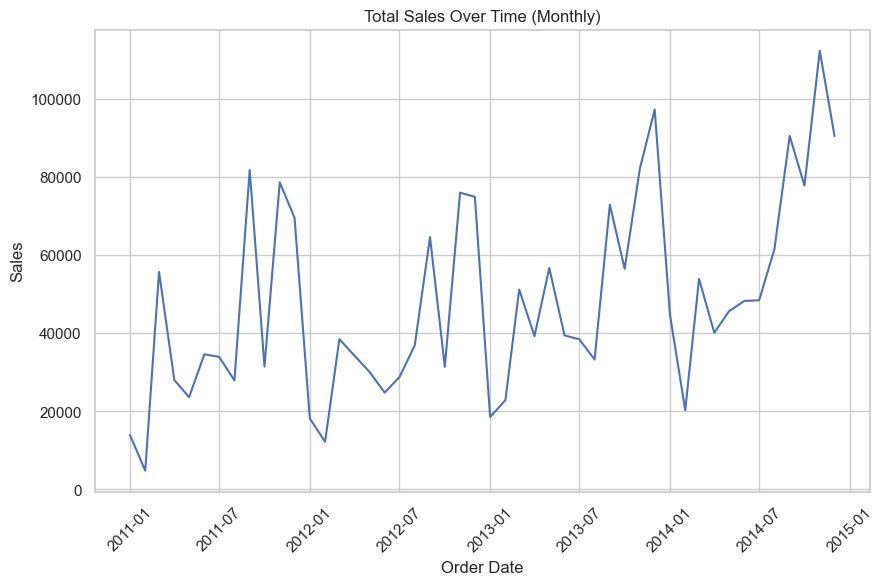

In [124]:

df['Order Date'] = pd.to_datetime(df['Order Date'])

# Group by the 'Order Date' by month and sum the sales
sales_over_time = df.groupby(df['Order Date'].dt.to_period("M"))['Sales'].sum().reset_index()

# Convert 'Order Date' back to a datetime format for plotting
sales_over_time['Order Date'] = sales_over_time['Order Date'].dt.to_timestamp()

# Plot Sales Over Time (Monthly)
plt.figure(figsize=(10, 6))
sns.lineplot(x='Order Date', y='Sales', data=sales_over_time)
plt.title('Total Sales Over Time (Monthly)')
plt.xticks(rotation=45)
plt.show()


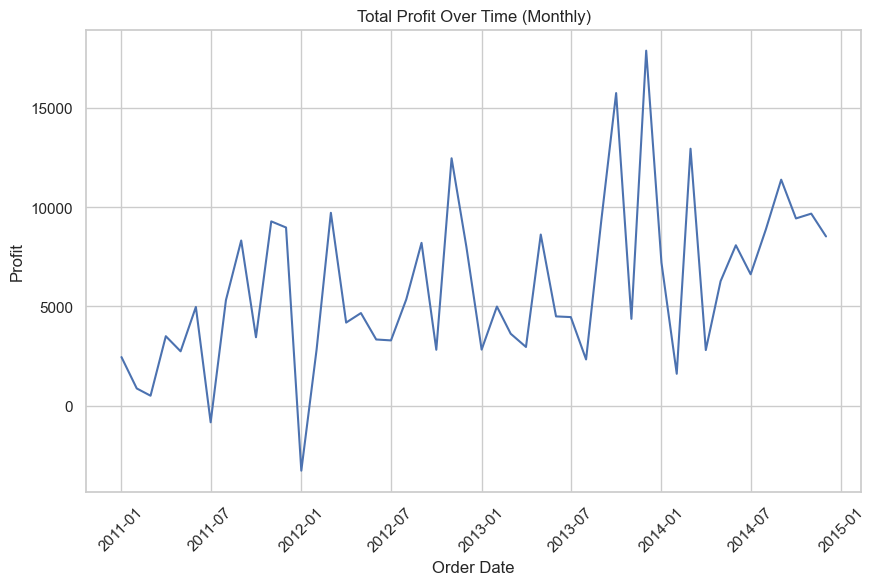

In [125]:

df['Order Date'] = pd.to_datetime(df['Order Date'])

# Group by the 'Order Date' by month and sum the sales
sales_over_time = df.groupby(df['Order Date'].dt.to_period("M"))['Profit'].sum().reset_index()

# Convert 'Order Date' back to a datetime format for plotting
sales_over_time['Order Date'] = sales_over_time['Order Date'].dt.to_timestamp()

# Plot Sales Over Time (Monthly)
plt.figure(figsize=(10, 6))
sns.lineplot(x='Order Date', y='Profit', data=sales_over_time)
plt.title('Total Profit Over Time (Monthly)')
plt.xticks(rotation=45)
plt.show()


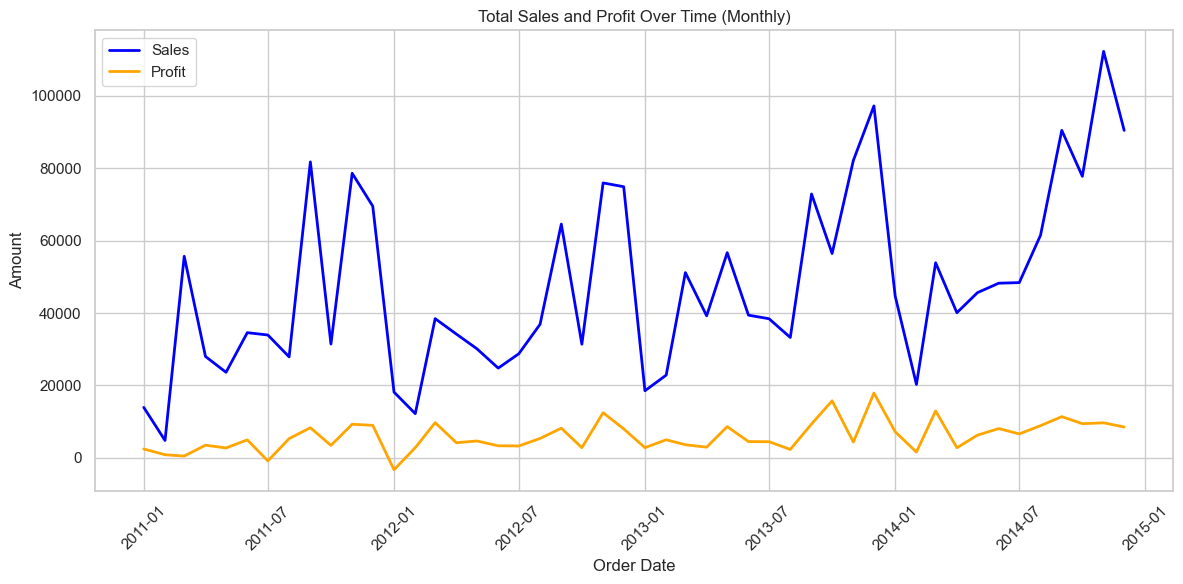

In [126]:

df['Order Date'] = pd.to_datetime(df['Order Date'])

# Group by the 'Order Date' by month and sum the sales and profit
sales_profit_over_time = df.groupby(df['Order Date'].dt.to_period("M"))[['Sales', 'Profit']].sum().reset_index()

# Convert 'Order Date' back to a datetime format for plotting
sales_profit_over_time['Order Date'] = sales_profit_over_time['Order Date'].dt.to_timestamp()

# Plot Sales and Profit Over Time (Monthly)
plt.figure(figsize=(12, 6))
sns.lineplot(x='Order Date', y='Sales', data=sales_profit_over_time, label='Sales', color='blue', linewidth=2)
sns.lineplot(x='Order Date', y='Profit', data=sales_profit_over_time, label='Profit', color='orange', linewidth=2)

plt.title('Total Sales and Profit Over Time (Monthly)')
plt.xticks(rotation=45)
plt.ylabel('Amount')
plt.legend()
plt.tight_layout()
plt.show()


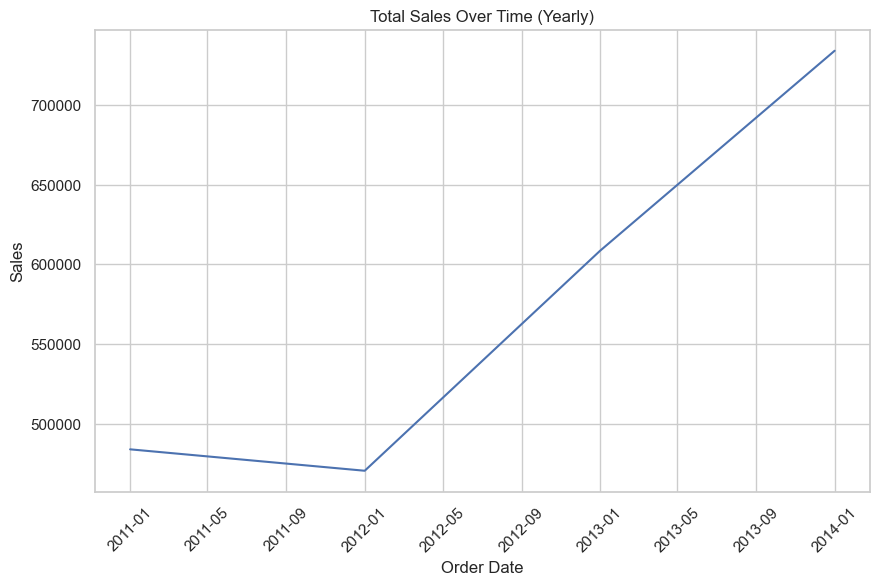

In [127]:


# Group by the 'Order Date' by year and sum the sales
sales_over_time = df.groupby(df['Order Date'].dt.to_period("Y"))['Sales'].sum().reset_index()

# Convert 'Order Date' back to a datetime format for plotting
sales_over_time['Order Date'] = sales_over_time['Order Date'].dt.to_timestamp()

# Plot Sales Over Time (Yearly)
plt.figure(figsize=(10, 6))
sns.lineplot(x='Order Date', y='Sales', data=sales_over_time)
plt.title('Total Sales Over Time (Yearly)')
plt.xticks(rotation=45)
plt.show()


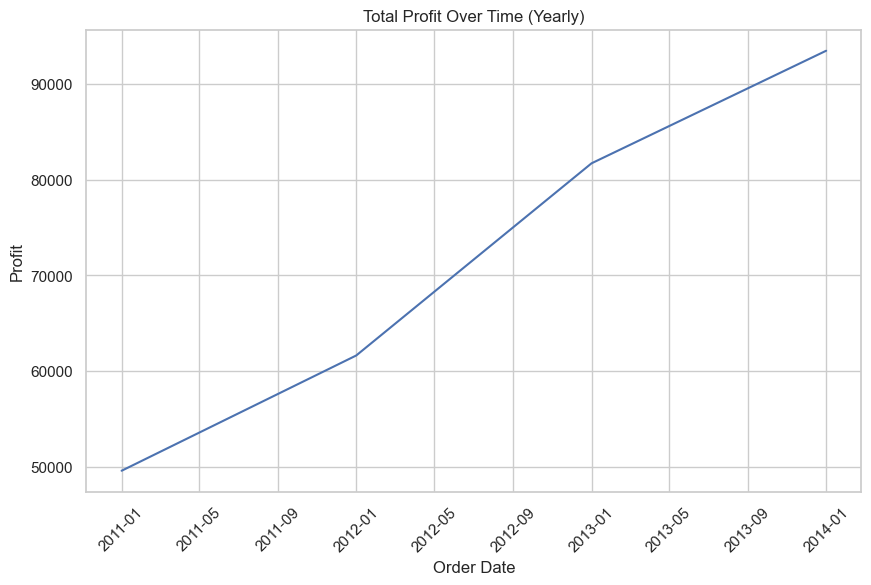

In [128]:


# Group by the 'Order Date' by year and sum the sales
sales_over_time = df.groupby(df['Order Date'].dt.to_period("Y"))['Profit'].sum().reset_index()

# Convert 'Order Date' back to a datetime format for plotting
sales_over_time['Order Date'] = sales_over_time['Order Date'].dt.to_timestamp()

# Plot Sales Over Time (Yearly)
plt.figure(figsize=(10, 6))
sns.lineplot(x='Order Date', y='Profit', data=sales_over_time)
plt.title('Total Profit Over Time (Yearly)')
plt.xticks(rotation=45)
plt.show()


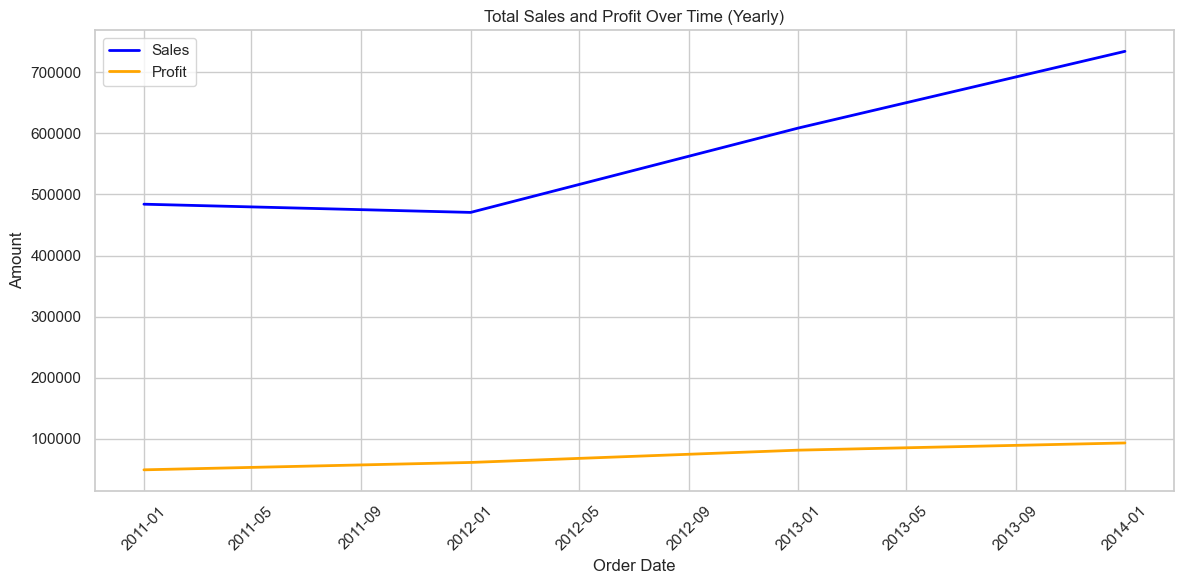

In [129]:
# Ensure 'Order Date' is in datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Group by the 'Order Date' by month and sum the sales and profit
sales_profit_over_time = df.groupby(df['Order Date'].dt.to_period("Y"))[['Sales', 'Profit']].sum().reset_index()

# Convert 'Order Date' back to a datetime format for plotting
sales_profit_over_time['Order Date'] = sales_profit_over_time['Order Date'].dt.to_timestamp()

# Plot Sales and Profit Over Time (Monthly)
plt.figure(figsize=(12, 6))
sns.lineplot(x='Order Date', y='Sales', data=sales_profit_over_time, label='Sales', color='blue', linewidth=2)
sns.lineplot(x='Order Date', y='Profit', data=sales_profit_over_time, label='Profit', color='orange', linewidth=2)

plt.title('Total Sales and Profit Over Time (Yearly)')
plt.xticks(rotation=45)
plt.ylabel('Amount')
plt.legend()
plt.tight_layout()
plt.show()


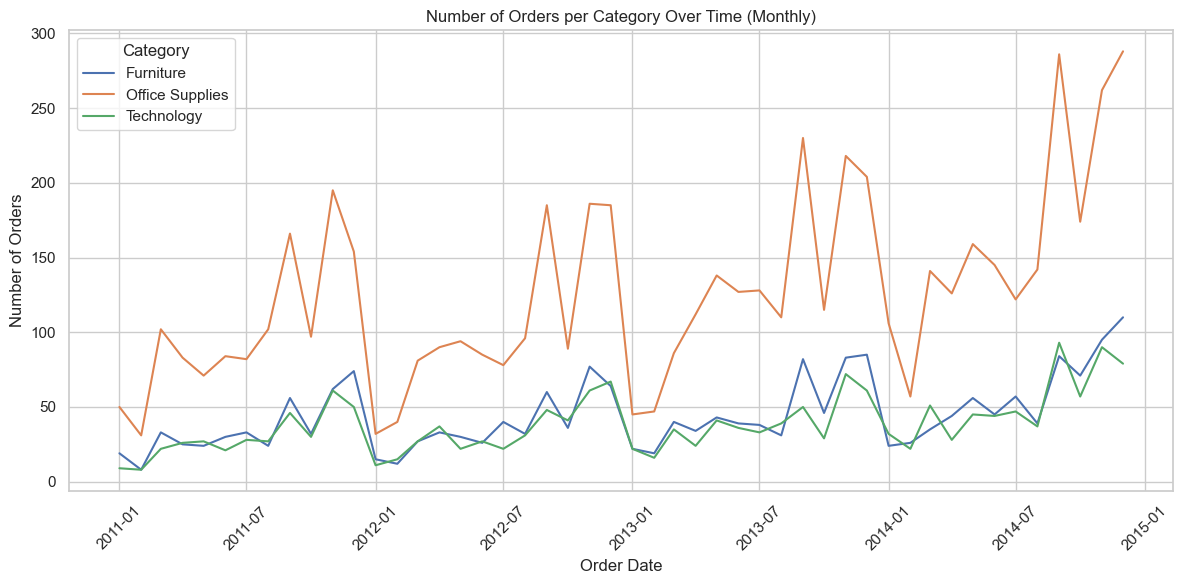

In [130]:
# Ensure 'Order Date' is in datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Group by the 'Order Date' by month and count the number of orders per Category
orders_per_category_over_time = df.groupby([df['Order Date'].dt.to_period("M"), 'Category']).size().reset_index(name='Count')

# Convert 'Order Date' back to a datetime format for plotting
orders_per_category_over_time['Order Date'] = orders_per_category_over_time['Order Date'].dt.to_timestamp()

# Plot Orders Per Category Over Time (Monthly)
plt.figure(figsize=(12, 6))
sns.lineplot(x='Order Date', y='Count', hue='Category', data=orders_per_category_over_time)
plt.title('Number of Orders per Category Over Time (Monthly)')
plt.xticks(rotation=45)
plt.ylabel('Number of Orders')
plt.legend(title='Category')
plt.tight_layout()
plt.show()


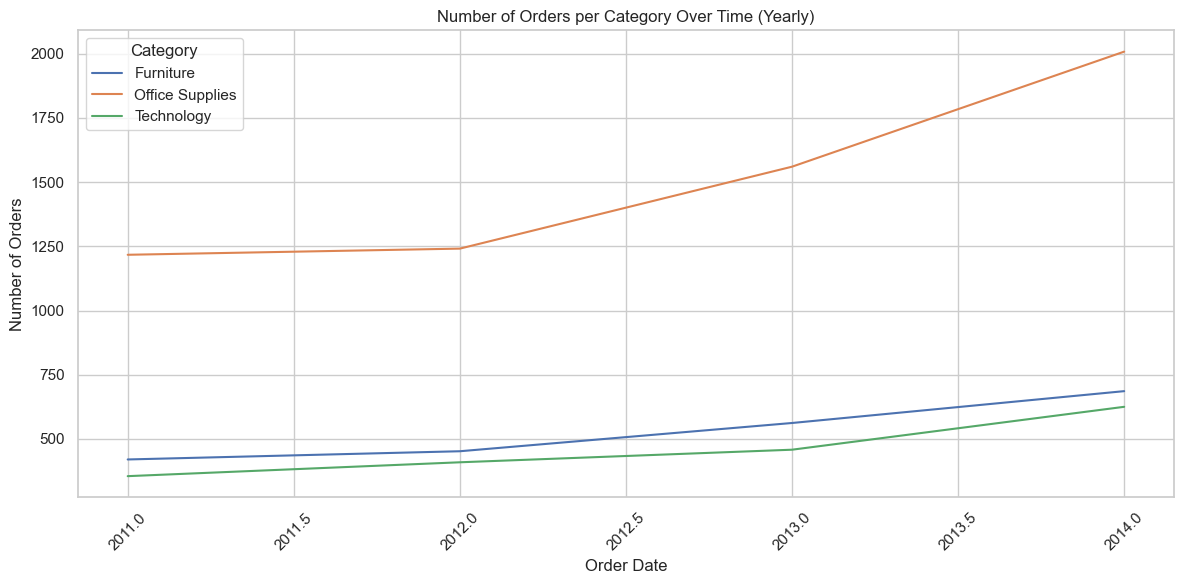

In [131]:
# Ensure 'Order Date' is in datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Group by the 'Order Date' by year and count the number of orders per Category
orders_per_category_yearly = df.groupby([df['Order Date'].dt.year, 'Category']).size().reset_index(name='Count')

# Plot Orders Per Category Over Time (Yearly)
plt.figure(figsize=(12, 6))
sns.lineplot(x='Order Date', y='Count', hue='Category', data=orders_per_category_yearly)
plt.title('Number of Orders per Category Over Time (Yearly)')
plt.xticks(rotation=45)
plt.ylabel('Number of Orders')
plt.legend(title='Category')
plt.tight_layout()
plt.show()


* Office Supplies have the highest number of orders 

In [132]:
df.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


# Feature Engineering¶


In [45]:
df = data.copy()

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [47]:
df.describe()

Row ID   Postal Code         Sales     Quantity     Discount  \
count  9994.000000   9994.000000   9994.000000  9994.000000  9994.000000   
mean   4997.500000  55190.379428    229.858001     3.789574     0.156203   
std    2885.163629  32063.693350    623.245101     2.225110     0.206452   
min       1.000000   1040.000000      0.444000     1.000000     0.000000   
25%    2499.250000  23223.000000     17.280000     2.000000     0.000000   
50%    4997.500000  56430.500000     54.490000     3.000000     0.200000   
75%    7495.750000  90008.000000    209.940000     5.000000     0.200000   
max    9994.000000  99301.000000  22638.480000    14.000000     0.800000   

            Profit  
count  9994.000000  
mean     28.656896  
std     234.260108  
min   -6599.978000  
25%       1.728750  
50%       8.666500  
75%      29.364000  
max    8399.976000

In [48]:
df.duplicated().sum()

0

In [49]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [50]:
df['Profit Margin'] = df['Profit']/df['Sales']
df['Discounted Profit'] = df['Profit']-df['Profit']*df['Discount']
df['Discount Percentage'] = df['Discount']/df['Sales']*100

In [51]:
# Select only numeric columns
#df_numeric = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
#corr_matrix = df_numeric.corr()

# Plot the correlation matrix
#plt.figure(figsize=(8,6))
#sns.heatmap(corr_matrix, annot=True, cmap='vlag')
#plt.show()

In [52]:
df=df.drop(['Order ID', 'Order Date', 'Ship Date', 'Customer ID',
       'Customer Name','City','State','Product ID','Product Name',"Country","Row ID"],axis=1)

## encoding

In [77]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# List of columns that will be encoded
cols_to_encode = ['Ship Mode','Segment','Region','Category','Sub-Category']

# Apply the LabelEncoder to each column in the cols_to_encode list
for col in cols_to_encode:
     df[col] = label_encoder.fit_transform(df[col])


## Skewness

In [56]:
from scipy.stats import skew, boxcox
skewness = df.select_dtypes(include=['float64', 'int64']).apply(lambda x: skew(x.dropna()))
print("Skewness before transformation:\n", skewness)

Skewness before transformation:
 Postal Code            -0.128506
Sales                  12.970805
Quantity                1.278353
Discount                1.684042
Profit                  7.560297
Profit Margin          -2.894392
Discounted Profit      19.354584
Discount Percentage    10.827056
dtype: float64


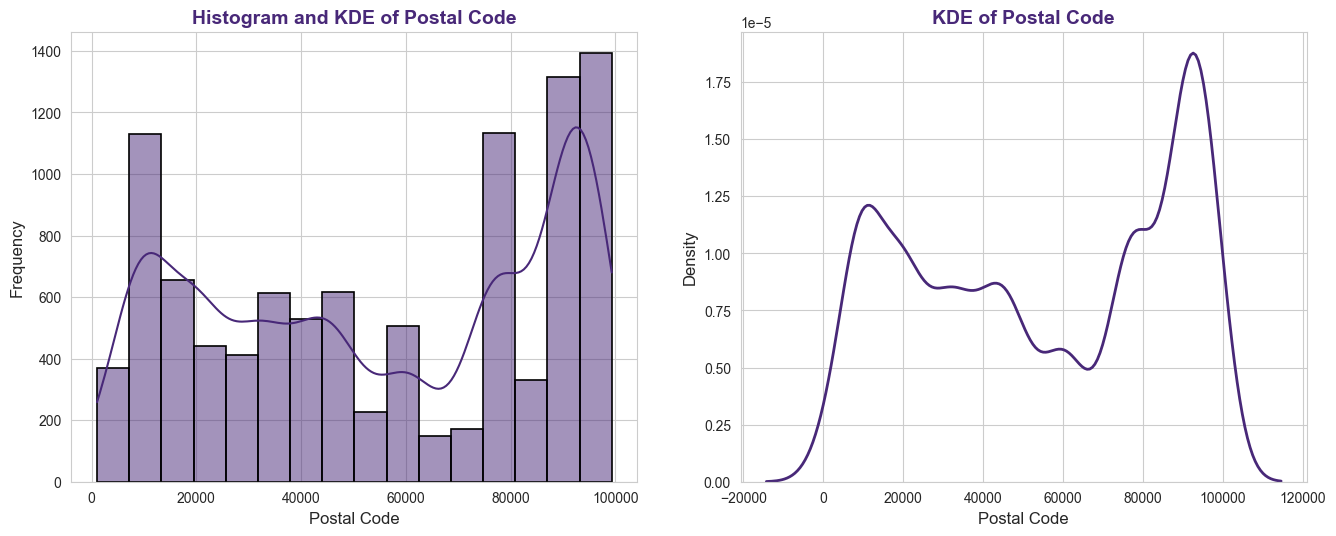

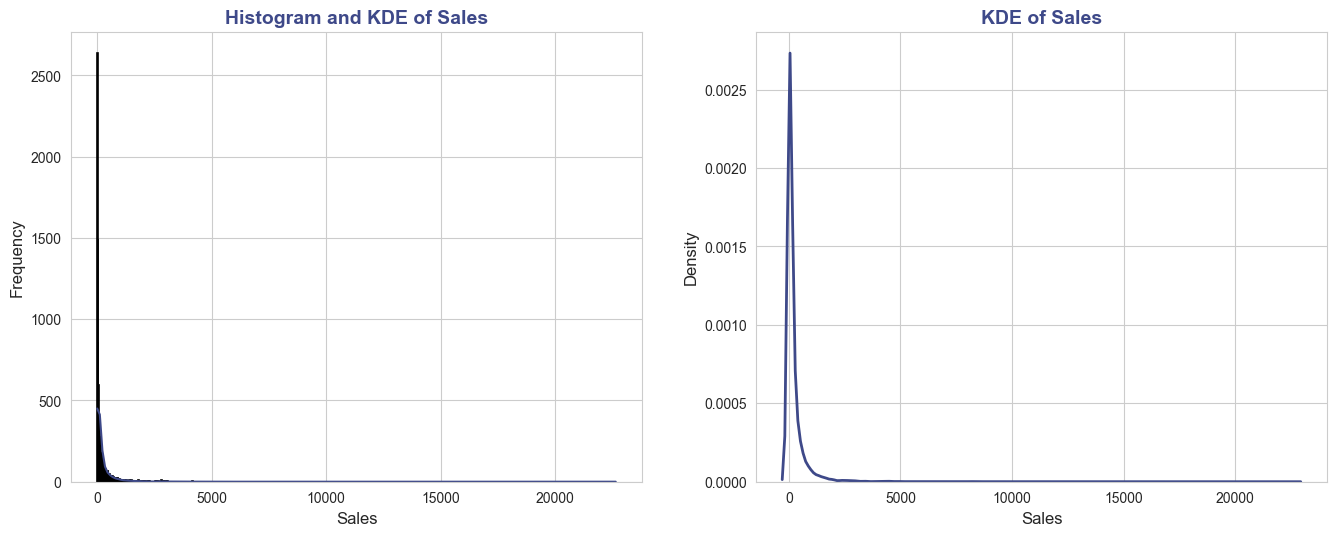

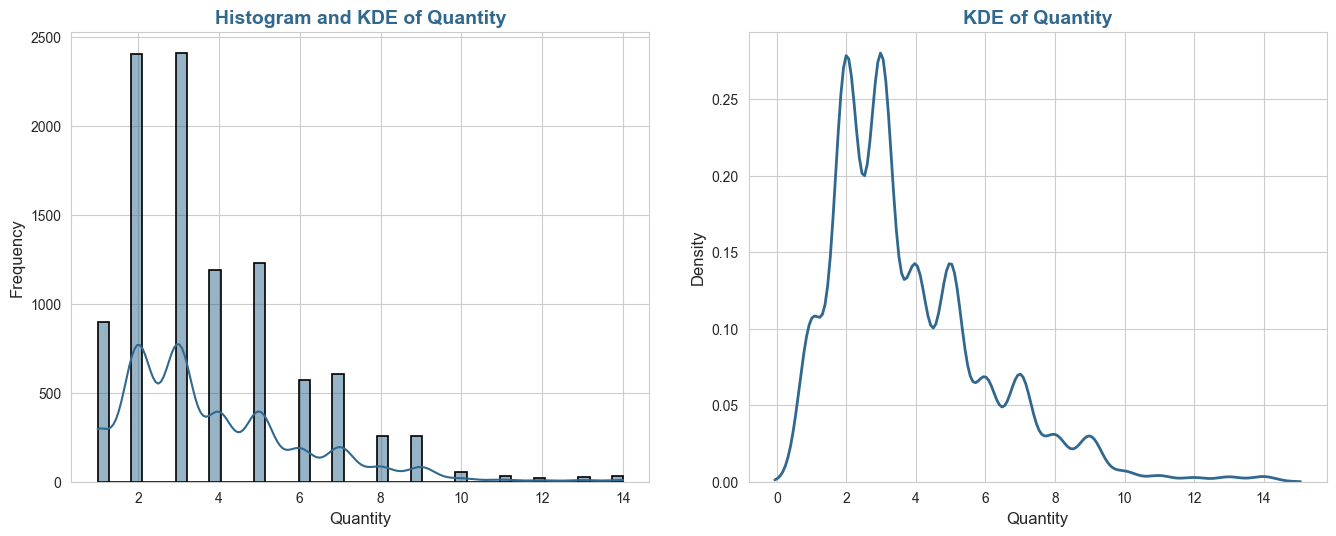

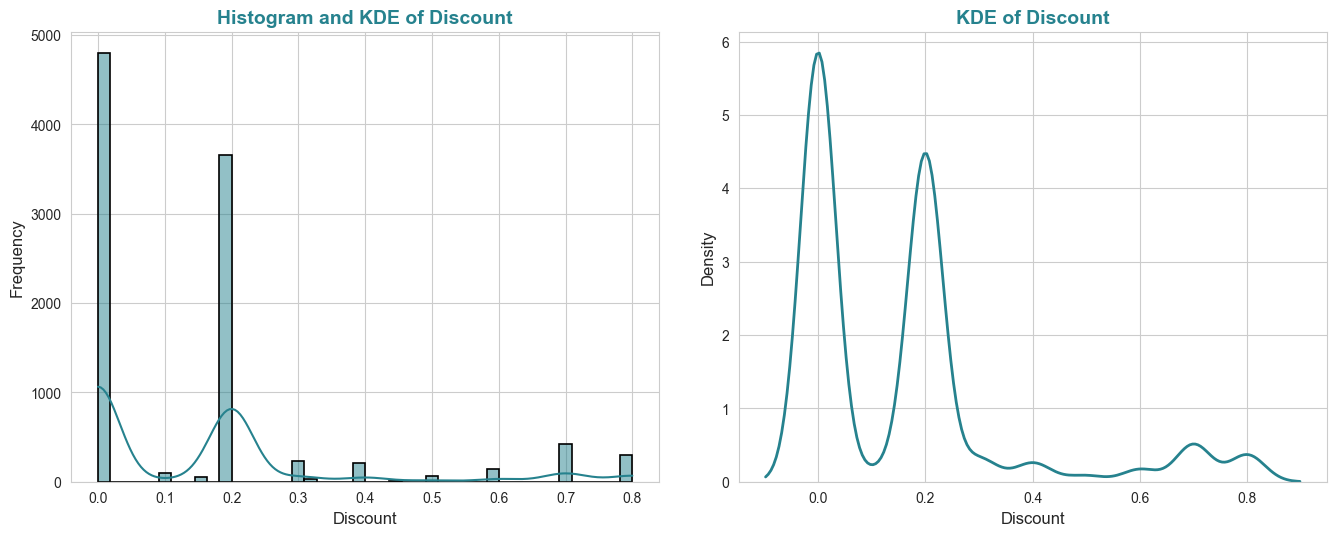

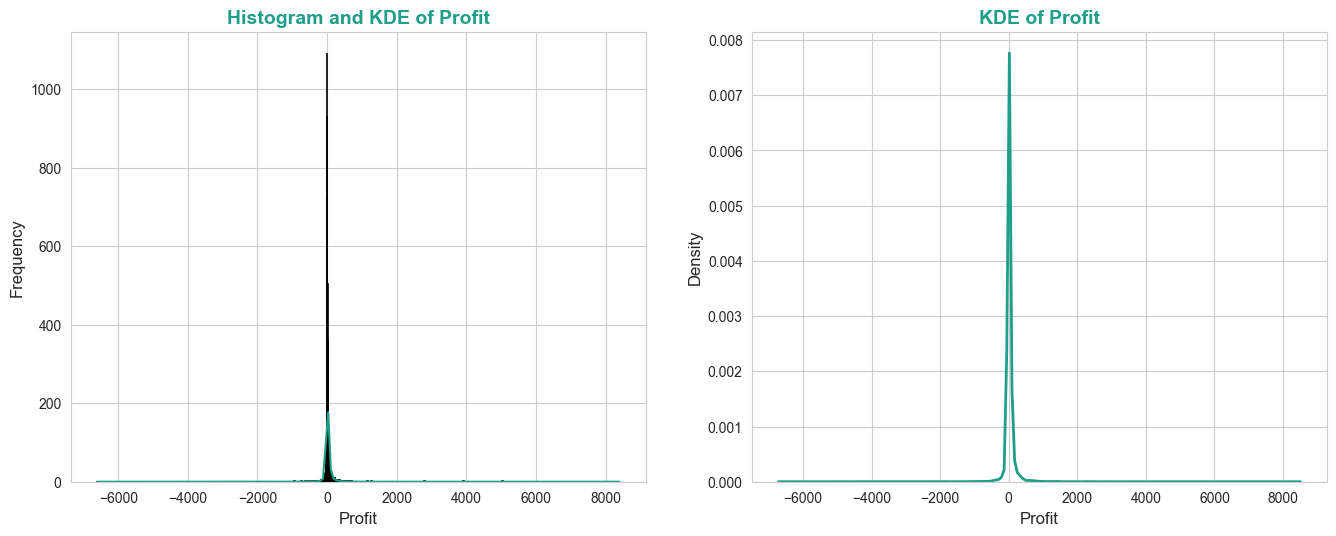

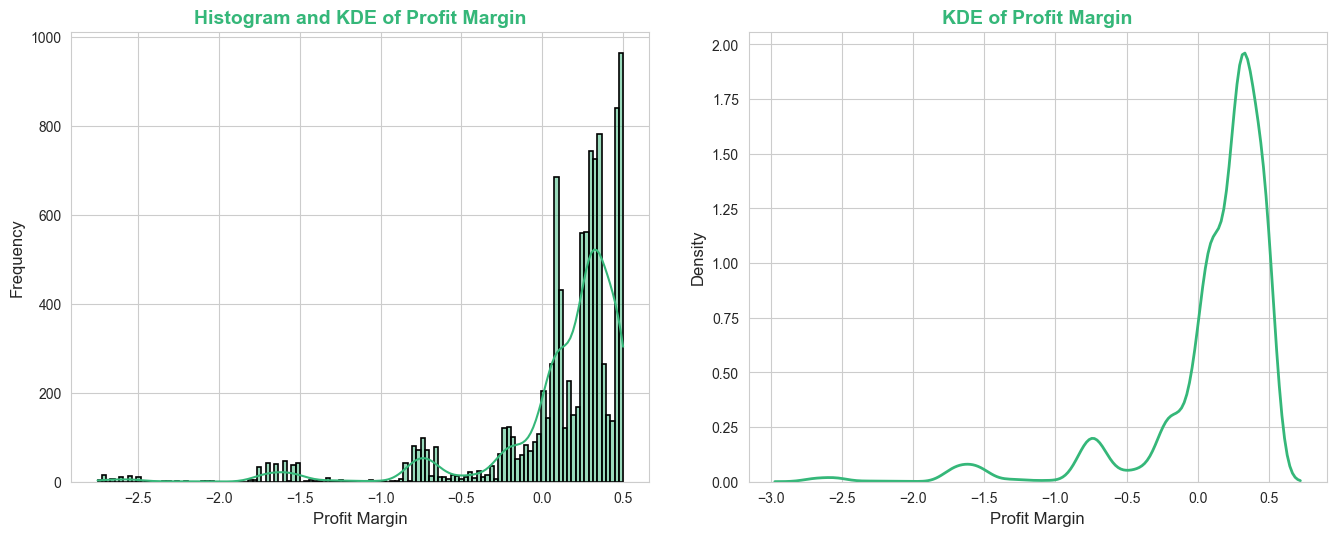

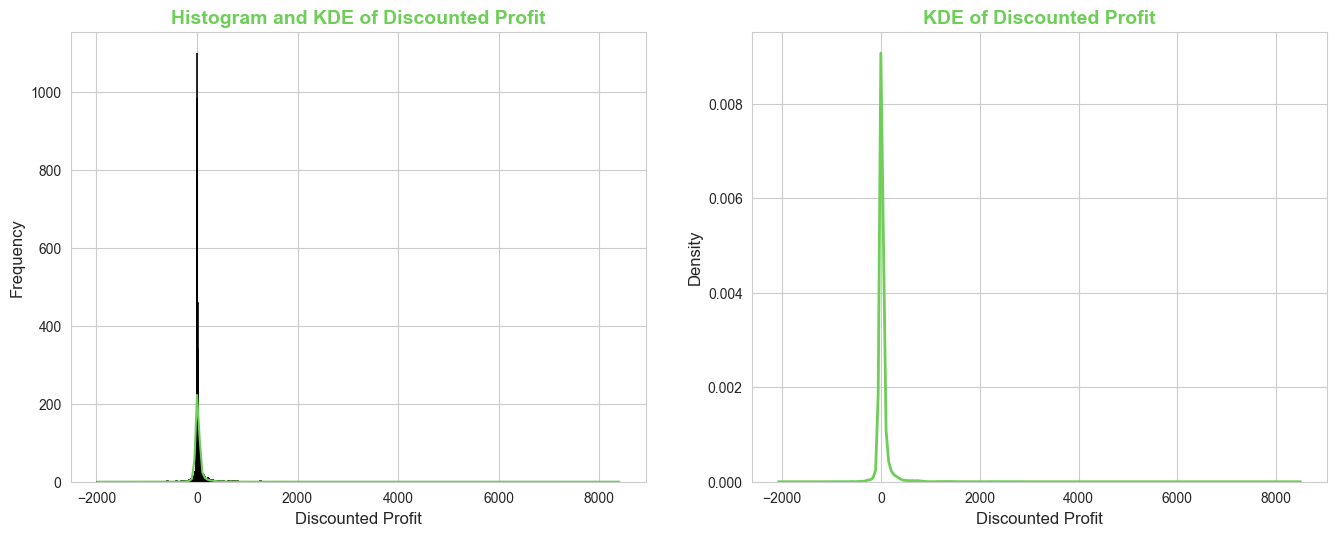

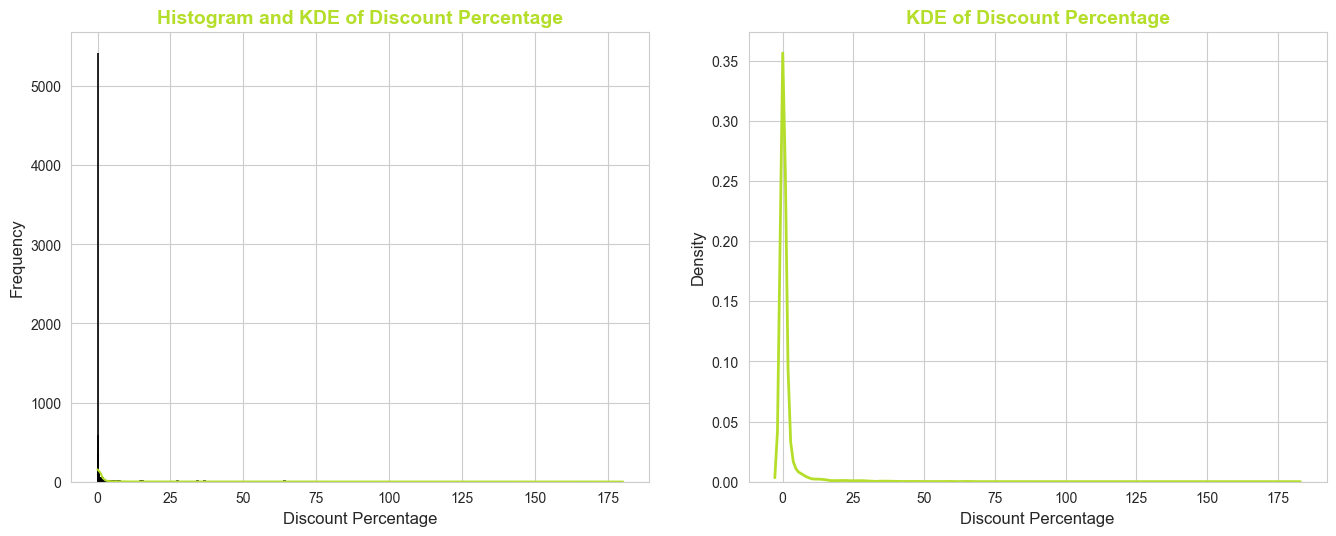

In [57]:
sns.set_style("whitegrid")
color_palette = sns.color_palette("viridis", len(df.select_dtypes(include=['float64', 'int64']).columns))

for i, column in enumerate(df.select_dtypes(include=['float64', 'int64']).columns):
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    sns.histplot(df[column], kde=True, color=color_palette[i], edgecolor='black', linewidth=1.2)
    plt.title(f'Histogram and KDE of {column}', fontsize=14, fontweight='bold', color=color_palette[i])
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

    plt.subplot(1, 2, 2)
    sns.kdeplot(df[column], color=color_palette[i], linewidth=2)
    plt.title(f'KDE of {column}', fontsize=14, fontweight='bold', color=color_palette[i])
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Density', fontsize=12)

    plt.tight_layout(pad=3.0)
    plt.show()


### Feature Transformation

Skewness of Quantity: 1.2785447527223421


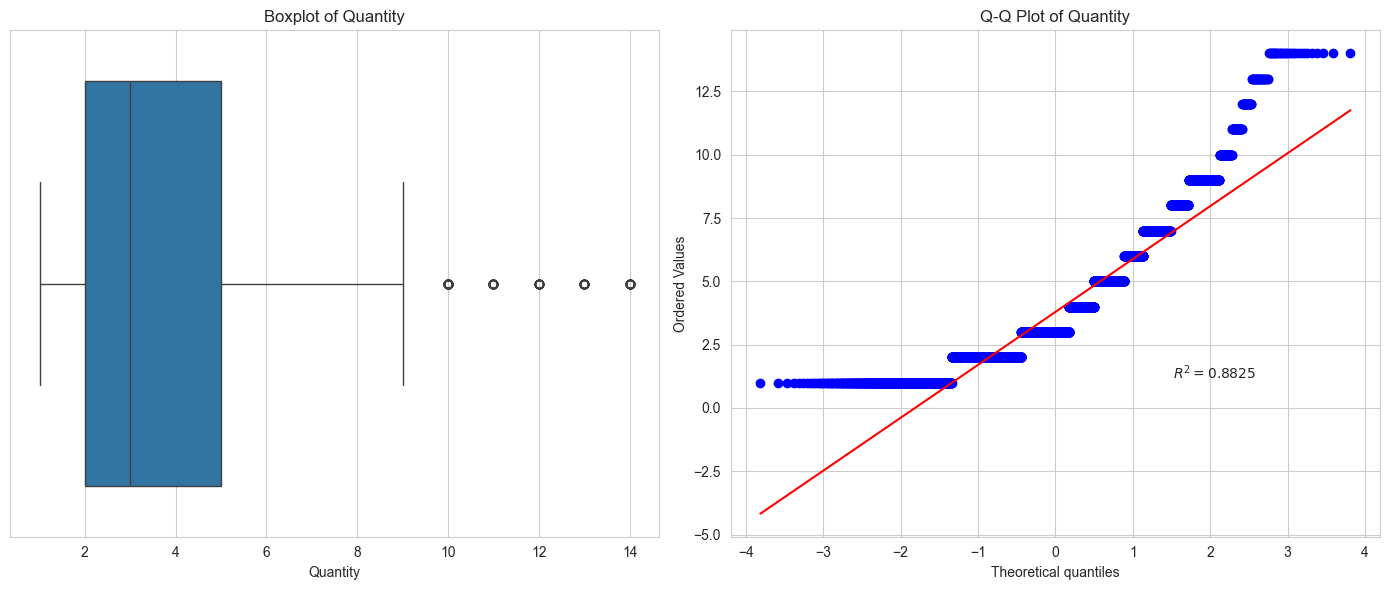

Skewness of Discount: 1.6842947474238648


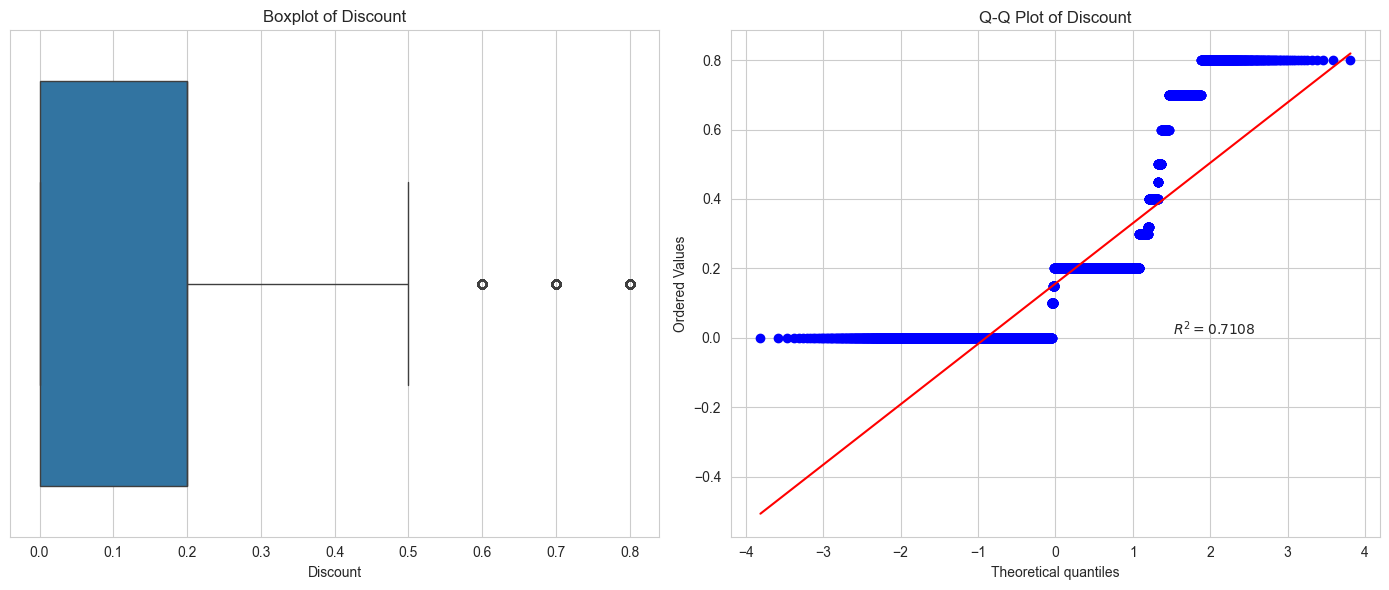

Skewness of Sales: 12.97275234181623


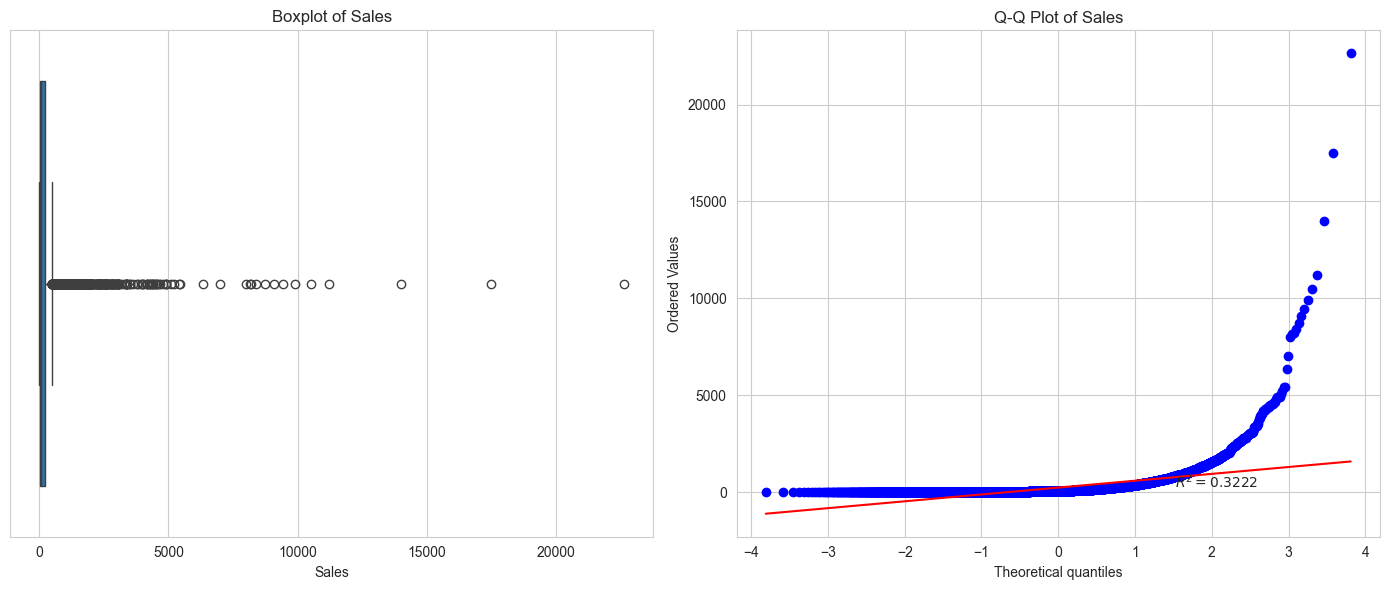

Skewness of Profit Margin: -2.8948263069055997


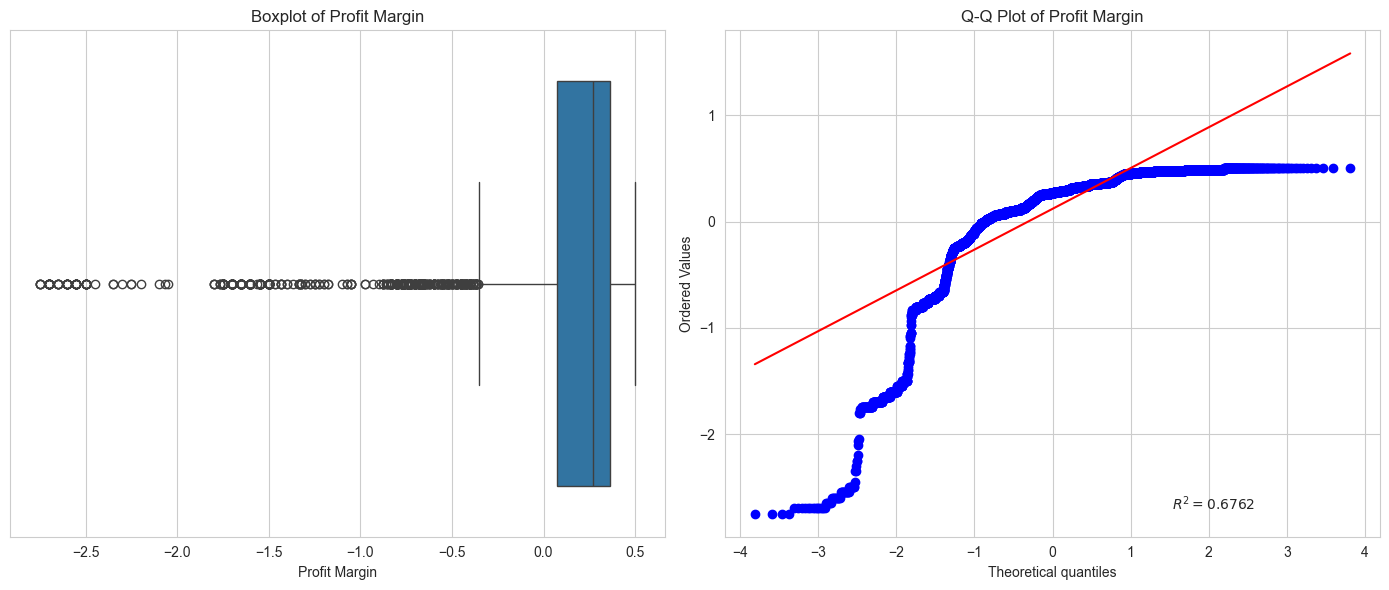

Skewness of Discounted Profit: 19.357489966004742


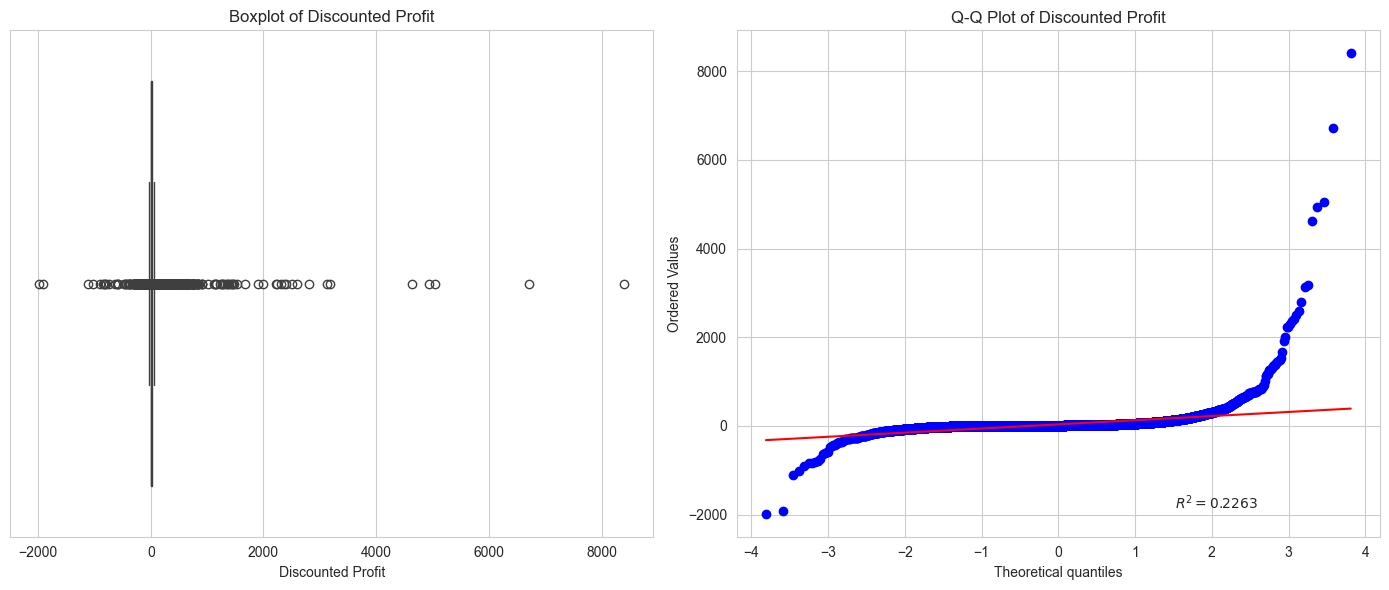

Skewness of Discount Percentage: 10.828681062923055


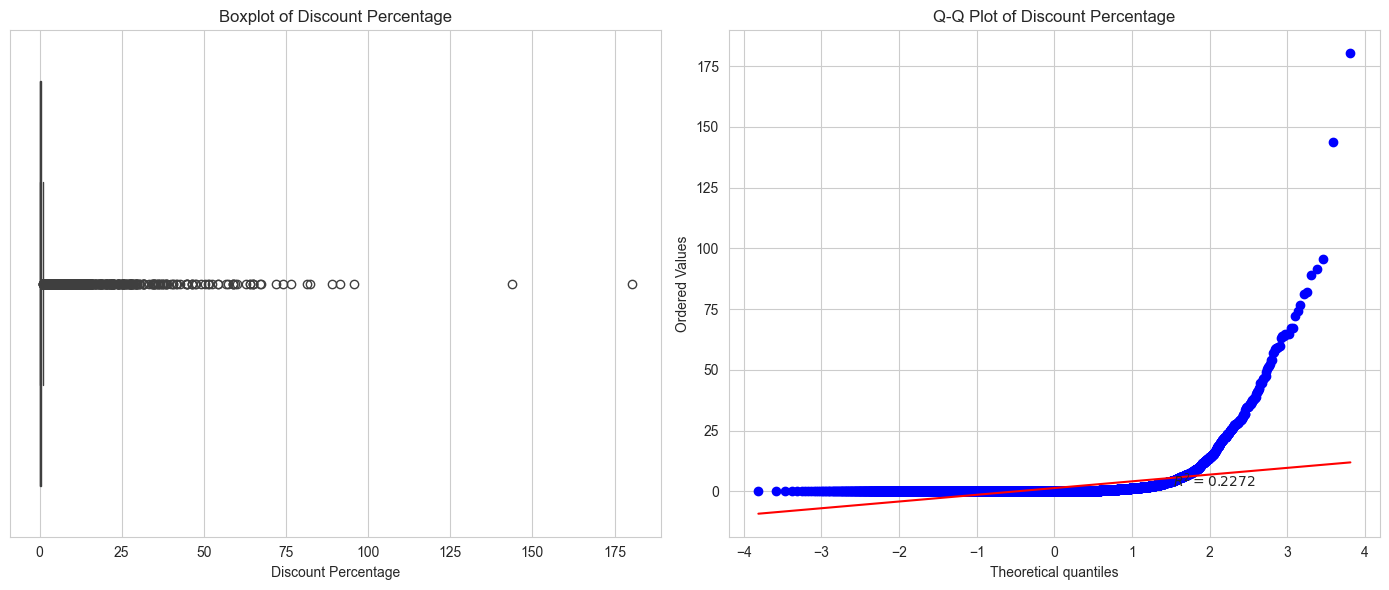

In [58]:
skewed_cols = ['Quantity',
 'Discount',
 'Sales',
 'Profit Margin',
 'Discounted Profit',
 'Discount Percentage',
]


for col in skewed_cols:
    print(f"Skewness of {col}:", df[col].skew())
    
    # Create a subplot with 1 row and 2 columns
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
    
    # Boxplot
    sns.boxplot(data=df, x=col, ax=axes[0])
    axes[0].set_title(f'Boxplot of {col}')
    
    # Q-Q plot
    probplot(df[col], dist='norm', plot=axes[1],rvalue=True)
    axes[1].set_title(f'Q-Q Plot of {col}')
    
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

In [59]:
def apply_transform(data, col, transformer):
    
    # Apply transformation
    col_tf = transformer.fit_transform(data[[col]])
    col_tf = np.array(col_tf).reshape(col_tf.shape[0])
    
    # Plot after transformation
    plt.figure(figsize=(14, 4))
    
    # Boxplot after transformation
    plt.subplot(131)
    sns.boxplot(col_tf)
    plt.title(f'{col} ')
    
    # Q-Q plot after transformation
    plt.subplot(132)
    probplot(col_tf, dist='norm', plot=plt,rvalue=True)
    plt.title(f'{col} ')
    
    plt.suptitle(f"{col} ")
    plt.show()
    
    # Garbage collection (optional for memory management)
    gc.collect()

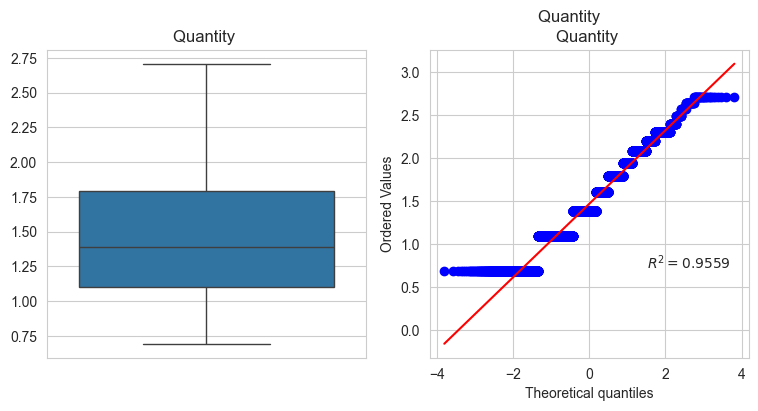

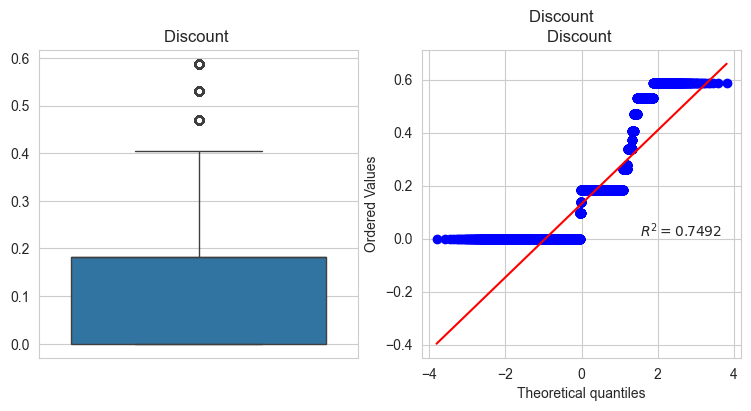

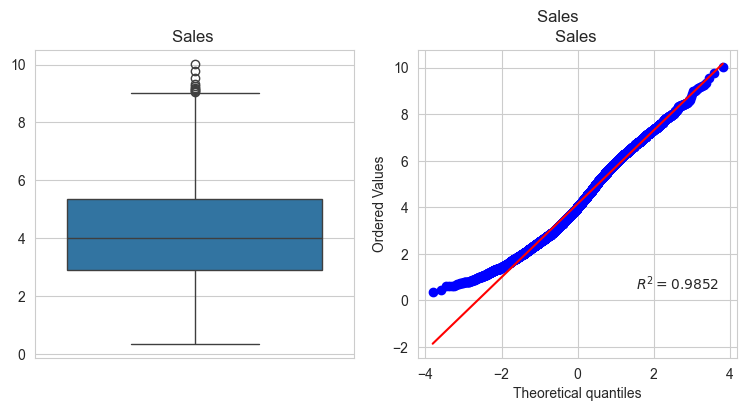

C:\Users\SHENDY LINK\AppData\Roaming\Python\Python311\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning:

invalid value encountered in log1p

posx and posy should be finite values
posx and posy should be finite values


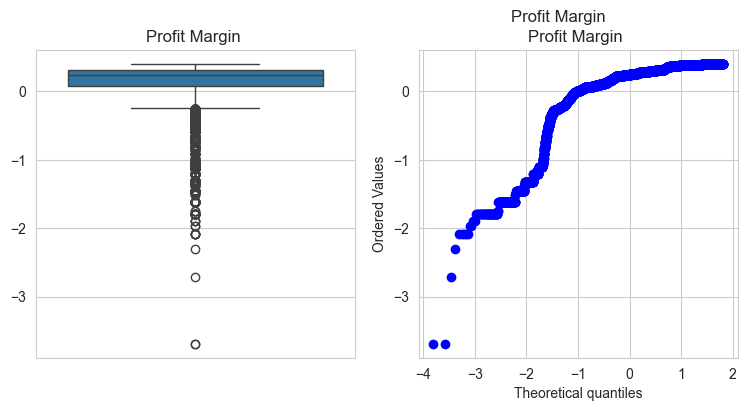

C:\Users\SHENDY LINK\AppData\Roaming\Python\Python311\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning:

invalid value encountered in log1p

posx and posy should be finite values
posx and posy should be finite values


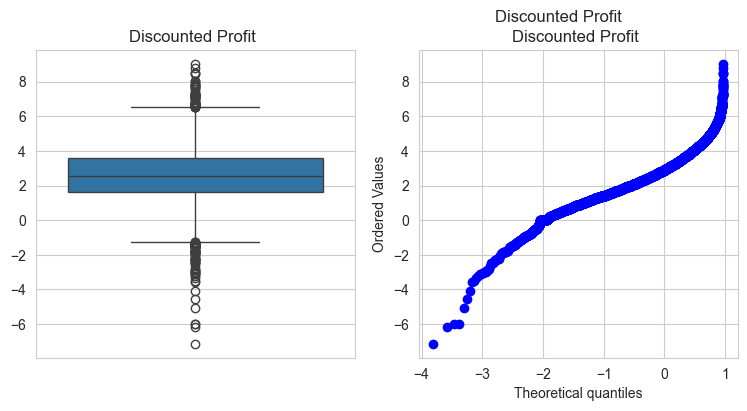

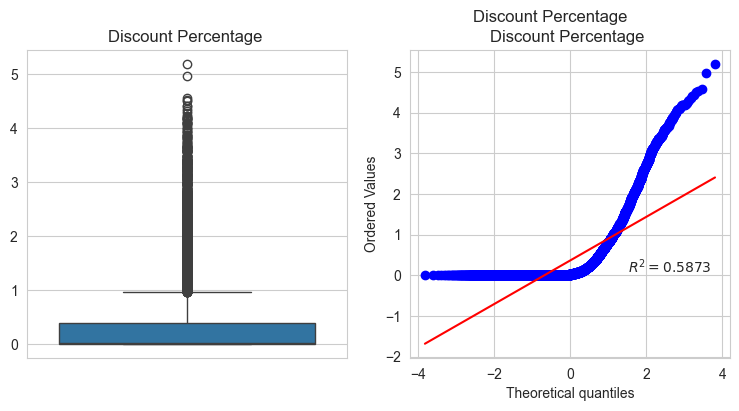

In [60]:
for col in skewed_cols:
    apply_transform(df,col,FunctionTransformer(np.log1p))

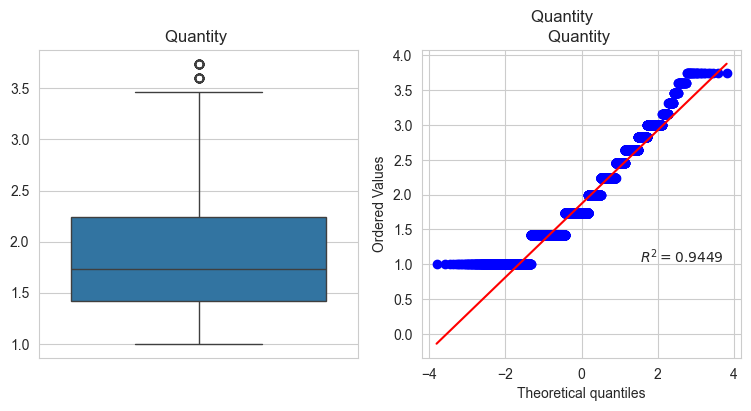

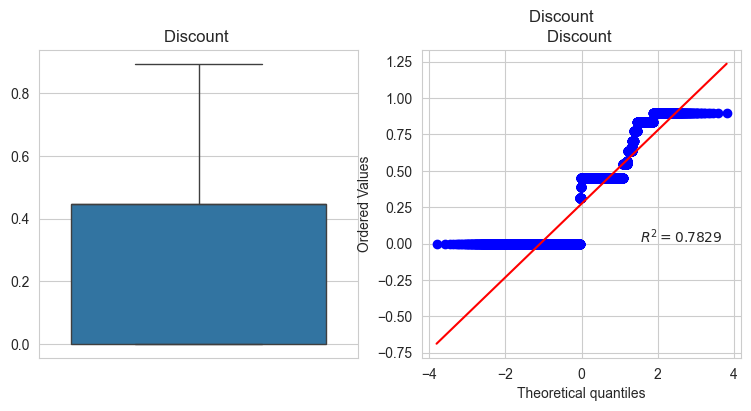

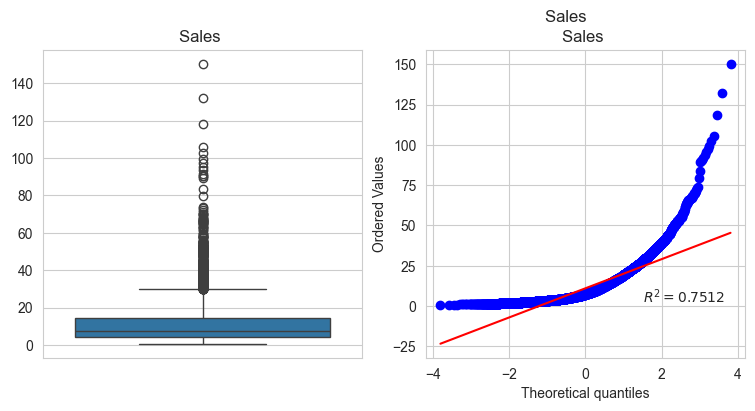

C:\Users\SHENDY LINK\AppData\Roaming\Python\Python311\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning:

invalid value encountered in sqrt

posx and posy should be finite values
posx and posy should be finite values


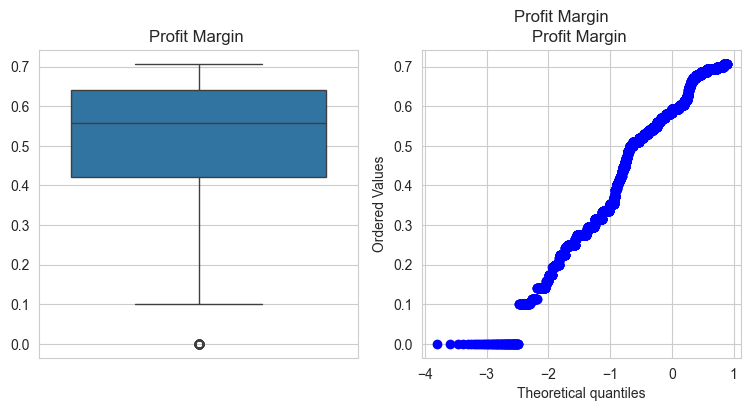

C:\Users\SHENDY LINK\AppData\Roaming\Python\Python311\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning:

invalid value encountered in sqrt

posx and posy should be finite values
posx and posy should be finite values


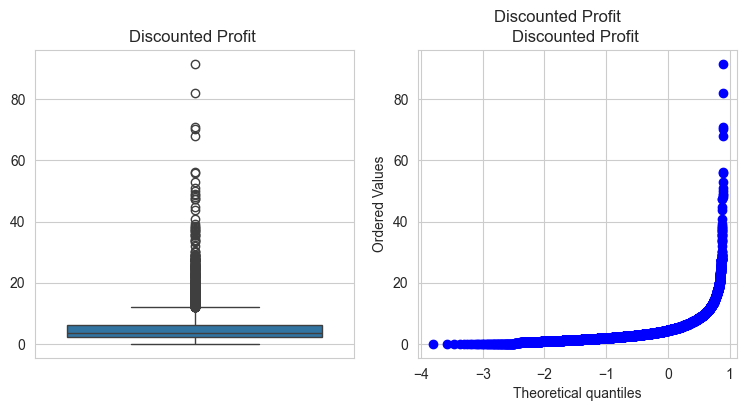

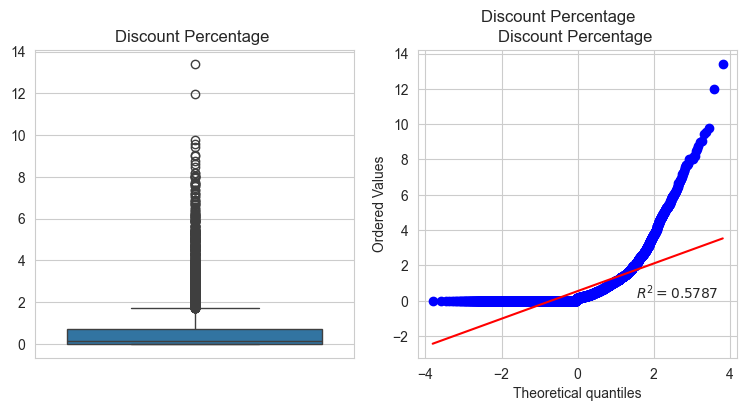

In [61]:
for col in skewed_cols:
    apply_transform(df,col,FunctionTransformer(np.sqrt))

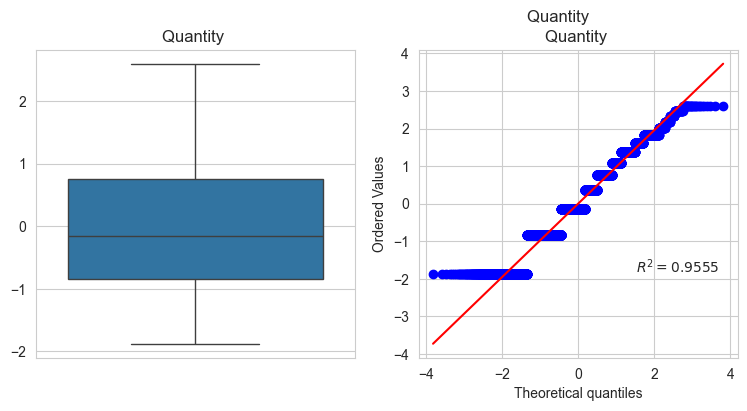

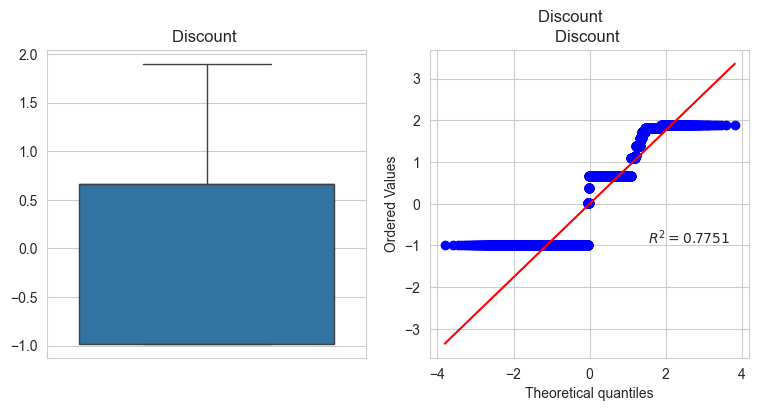

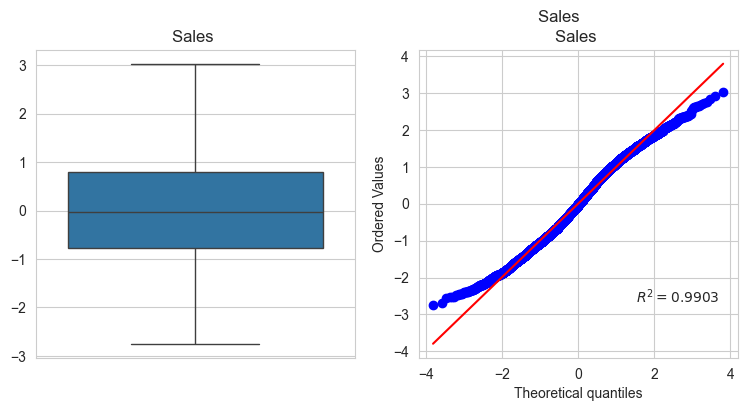

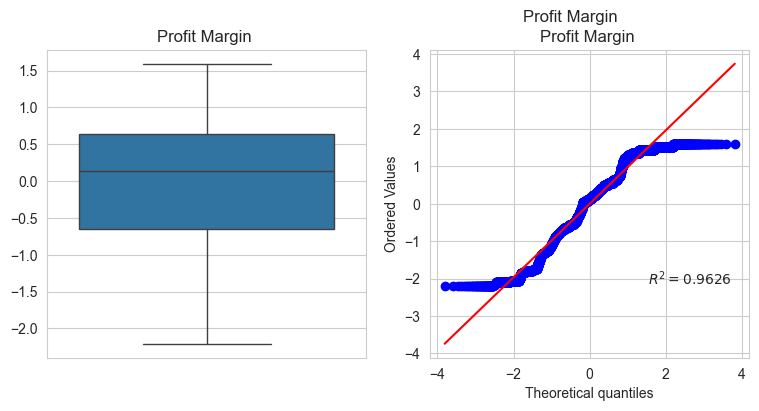

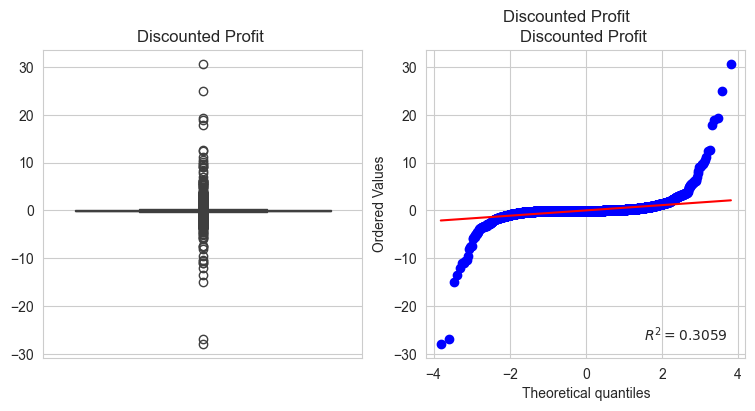

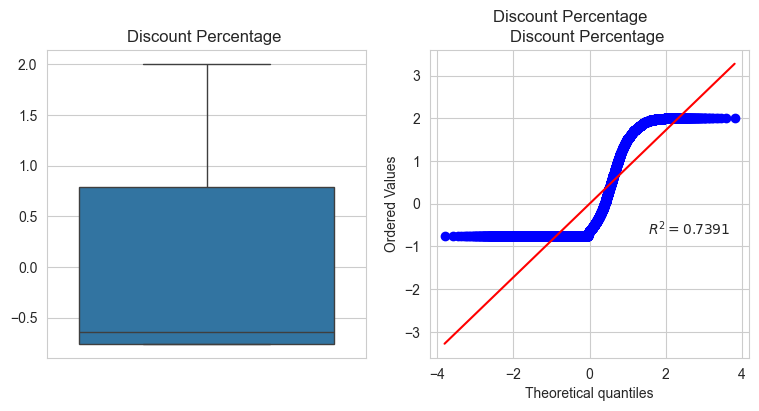

In [62]:
for col in skewed_cols:
    apply_transform(df,col,PowerTransformer())

In [63]:
transformer = ColumnTransformer(transformers=[
    ('log_transform',FunctionTransformer(np.log1p),['Quantity','Discounted Profit']),
    ('sqrt_transform',FunctionTransformer(np.sqrt),['Discount']),
    ('power_transform',PowerTransformer(),['Profit Margin','Sales','Discount Percentage'])
],remainder='passthrough')
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('log_transform',
                                 FunctionTransformer(func=<ufunc 'log1p'>),
                                 ['Quantity', 'Discounted Profit']),
                                ('sqrt_transform',
                                 FunctionTransformer(func=<ufunc 'sqrt'>),
                                 ['Discount']),
                                ('power_transform', PowerTransformer(),
                                 ['Profit Margin', 'Sales',
                                  'Discount Percentage'])])

In [78]:
# split into x, y
y_set=df.Profit
x_set=df.drop(['Profit'],axis=1)
print(f"the shape of the inputs x is: {x_set.shape}")
print(f"the shape of the targets y is: {y_set.shape}")# split into x, y

the shape of the inputs x is: (9994, 12)
the shape of the targets y is: (9994,)


# Modeling

## Split the Data

In [79]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(x_set, y_set, test_size=0.3, random_state=42)

In [80]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6995 entries, 3428 to 7270
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Ship Mode            6995 non-null   int64  
 1   Segment              6995 non-null   int32  
 2   Postal Code          6995 non-null   int64  
 3   Region               6995 non-null   int32  
 4   Category             6995 non-null   int32  
 5   Sub-Category         6995 non-null   int32  
 6   Sales                6995 non-null   float64
 7   Quantity             6995 non-null   int64  
 8   Discount             6995 non-null   float64
 9   Profit Margin        6995 non-null   float64
 10  Discounted Profit    6995 non-null   float64
 11  Discount Percentage  6995 non-null   float64
dtypes: float64(5), int32(4), int64(3)
memory usage: 601.1 KB


In [81]:
x_train_transformed = transformer.fit_transform(X_train)
x_train_transformed = pd.DataFrame(X_train,columns=X_train.columns)
x_test_transformed = transformer.transform(X_test)
x_test_transformed = pd.DataFrame(X_test,columns=X_test.columns)

C:\Users\SHENDY LINK\AppData\Roaming\Python\Python311\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning:

invalid value encountered in log1p

C:\Users\SHENDY LINK\AppData\Roaming\Python\Python311\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning:

invalid value encountered in log1p



In [84]:
# Define scalers and models
scalers = {
    'Robust': RobustScaler(),
    'MinMax': MinMaxScaler(),
    'Standard': StandardScaler()
}

models = {
    "KNN": (KNeighborsRegressor(), {"n_neighbors": [3, 5, 7]}),
    "RandomForest": (RandomForestRegressor(), {'n_estimators': [100, 150, 200], 'max_depth': [10, 20, 30]}),
    "XGBoost": (XGBRegressor(eval_metric='rmse'), {'n_estimators': [50, 100, 150], 'max_depth': [3, 5, 7], 'learning_rate': [0.01, 0.1, 0.3]}),
    "AdaBoost": (AdaBoostRegressor(), {'n_estimators': [50, 100], 'learning_rate': [0.1, 0.5, 1]})
}

# Initialize an empty dataframe for results
results = pd.DataFrame(columns=['Scaler', 'Model', 'Train R2', 'Test R2', 'Train MSE', 'Test MSE', 'Train RMSE', 'Test RMSE', 'Train MAE', 'Test MAE'])

# Loop through models and scalers
for model_name, (model, param_grid) in models.items():
    for scaler_name, scaler in scalers.items():
        print(f"\nTraining {model_name} with {scaler_name} Scaler...")

        # Scale the data
        X_train_scaled = scaler.fit_transform(x_train_transformed)
        X_test_scaled = scaler.transform(x_test_transformed)

        # Perform GridSearchCV for hyperparameter tuning
        grid_search = GridSearchCV(model, param_grid, cv=3, scoring='neg_mean_squared_error')
        grid_search.fit(X_train_scaled, y_train)

        # Best model from GridSearchCV
        best_model = grid_search.best_estimator_

        # Predictions for both train and test sets
        y_train_pred = best_model.predict(X_train_scaled)
        y_test_pred = best_model.predict(X_test_scaled)

        # Calculate train and test metrics
        metrics = {
            'Train R2': r2_score(y_train, y_train_pred),
            'Test R2': r2_score(y_test, y_test_pred),
            'Train MSE': mean_squared_error(y_train, y_train_pred),
            'Test MSE': mean_squared_error(y_test, y_test_pred),
            'Train RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred)),
            'Test RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred)),
            'Train MAE': mean_absolute_error(y_train, y_train_pred),
            'Test MAE': mean_absolute_error(y_test, y_test_pred)
        }

        # Print the best hyperparameters
        print(f"Best parameters for {model_name} with {scaler_name} Scaler: {grid_search.best_params_}")
        print(f"Train/Test R²: {metrics['Train R2']:.4f}/{metrics['Test R2']:.4f}")
        
        # Add results to DataFrame
        new_row = {
            'Scaler': scaler_name,
            'Model': model_name,
            **metrics
        }
        results = pd.concat([results, pd.DataFrame([new_row])], ignore_index=True)




Training KNN with Robust Scaler...
Best parameters for KNN with Robust Scaler: {'n_neighbors': 3}
Train/Test R²: 0.9450/0.9343

Training KNN with MinMax Scaler...


C:\Users\SHENDY LINK\AppData\Local\Temp\ipykernel_7608\422541097.py:60: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Best parameters for KNN with MinMax Scaler: {'n_neighbors': 3}
Train/Test R²: 0.7078/0.2236

Training KNN with Standard Scaler...
Best parameters for KNN with Standard Scaler: {'n_neighbors': 3}
Train/Test R²: 0.9451/0.9127

Training RandomForest with Robust Scaler...
Best parameters for RandomForest with Robust Scaler: {'max_depth': 30, 'n_estimators': 100}
Train/Test R²: 0.9848/0.9689

Training RandomForest with MinMax Scaler...
Best parameters for RandomForest with MinMax Scaler: {'max_depth': 30, 'n_estimators': 150}
Train/Test R²: 0.9880/0.9490

Training RandomForest with Standard Scaler...
Best parameters for RandomForest with Standard Scaler: {'max_depth': 10, 'n_estimators': 100}
Train/Test R²: 0.9858/0.9597

Training XGBoost with Robust Scaler...
Best parameters for XGBoost with Robust Scaler: {'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 150}
Train/Test R²: 0.9984/0.7957

Training XGBoost with MinMax Scaler...
Best parameters for XGBoost with MinMax Scaler: {'learnin

In [85]:
# Show final results
results

Scaler         Model  Train R2   Test R2     Train MSE      Test MSE  \
0     Robust           KNN  0.944956  0.934284   3052.301997   3516.813055   
1     MinMax           KNN  0.707839  0.223556  16200.985060  41551.509818   
2   Standard           KNN  0.945054  0.912716   3046.896187   4671.023586   
3     Robust  RandomForest  0.984758  0.968853    845.192388   1666.824503   
4     MinMax  RandomForest  0.987976  0.948960    666.759451   2731.406999   
5   Standard  RandomForest  0.985799  0.959706    787.455433   2156.334119   
6     Robust       XGBoost  0.998386  0.795704     89.478879  10932.943725   
7     MinMax       XGBoost  0.998386  0.795704     89.478879  10932.943725   
8   Standard       XGBoost  0.998386  0.795704     89.478879  10932.943725   
9     Robust      AdaBoost  0.898779  0.808420   5612.952096  10252.450796   
10    MinMax      AdaBoost  0.897264  0.802070   5696.924893  10592.269689   
11  Standard      AdaBoost  0.898097  0.807508   5650.727679  10301.236380   

    Train RMSE   Test RMSE  Train MAE   Test MAE  
0    55.247642   59.302724   6.040234   9.144991  
1   127.283090  203.841875  34.181396  57.830215  
2    55.198697   68.344887  15.868940  24.689630  
3    29.072193   40.826762   1.559644   3.945505  
4    25.821686   52.262864   1.427619   4.407531  
5    28.061636   46.436345   2.806085   5.368107  
6     9.459328  104.560718   3.469071  11.984223  
7     9.459328  104.560718   3.469071  11.984223  
8     9.459328  104.560718   3.469071  11.984223  
9    74.919638  101.254387  41.215511  44.825566  
10   75.477976  102.918753  41.451512  45.405819  
11   75.171322  101.495007  39.797622  43.257175

**Evaluate Accuracy Metrics**

1. R² explains variance, but may not fully capture outliers.
2. MSE penalizes larger errors more heavily than MAE, which is useful for outlier detection.
3. RMSE is interpretable in the same units as the target, making it easier to explain.

C:\Users\SHENDY LINK\AppData\Local\Temp\ipykernel_7608\791737896.py:16: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




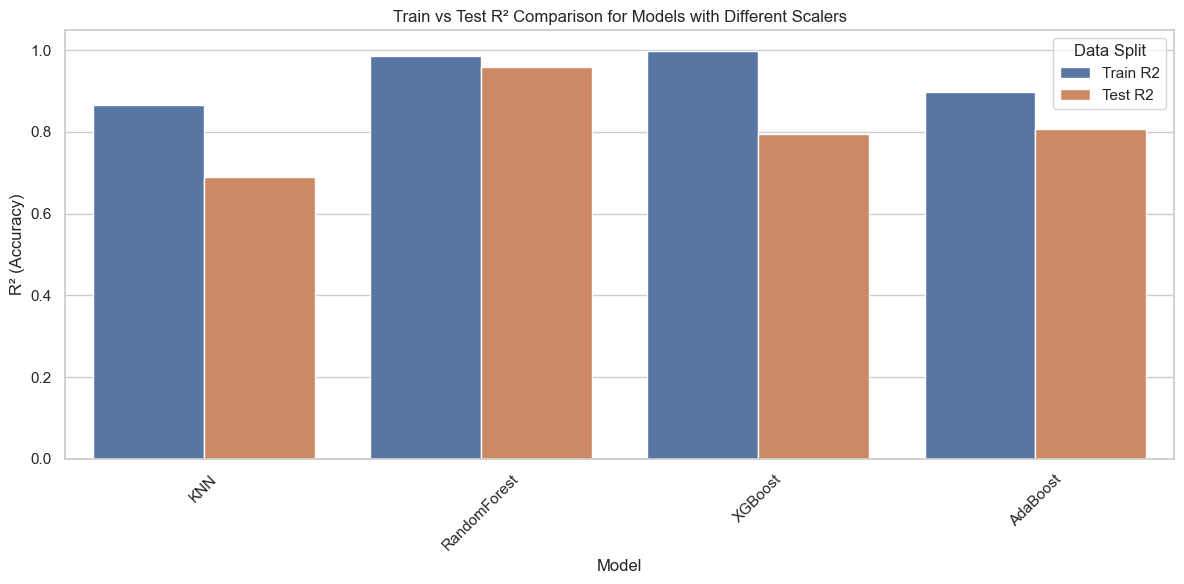

C:\Users\SHENDY LINK\AppData\Local\Temp\ipykernel_7608\791737896.py:38: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




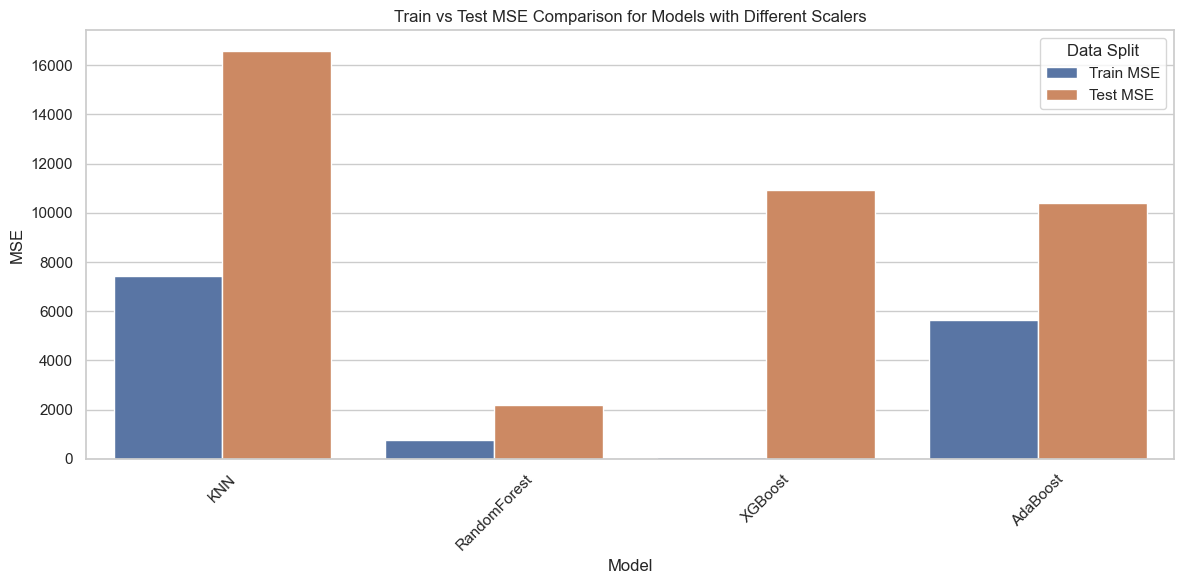

C:\Users\SHENDY LINK\AppData\Local\Temp\ipykernel_7608\791737896.py:38: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




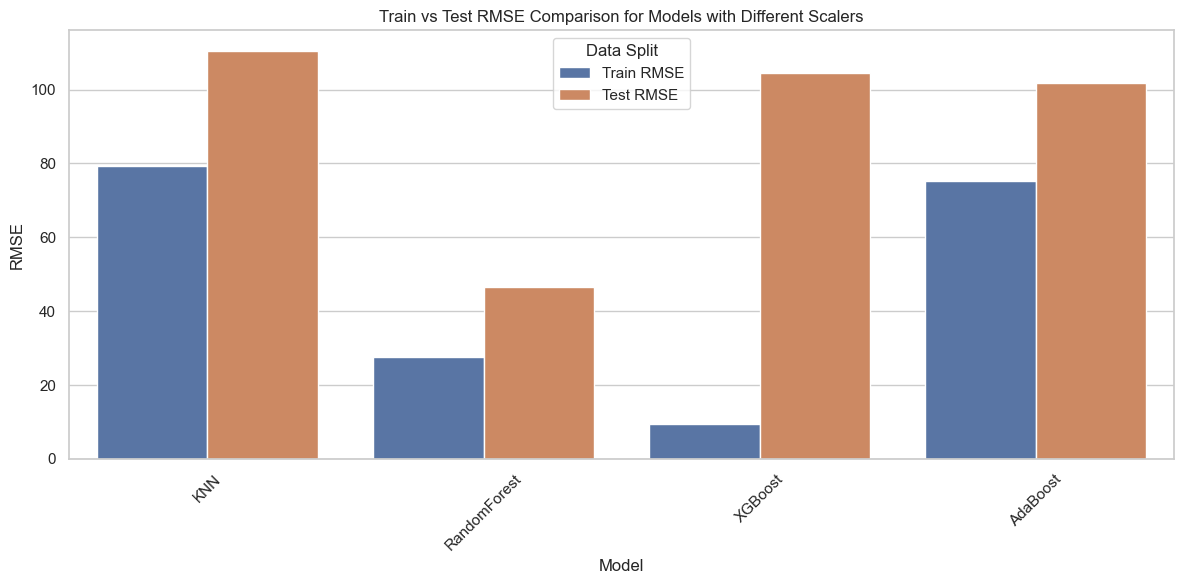

C:\Users\SHENDY LINK\AppData\Local\Temp\ipykernel_7608\791737896.py:38: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




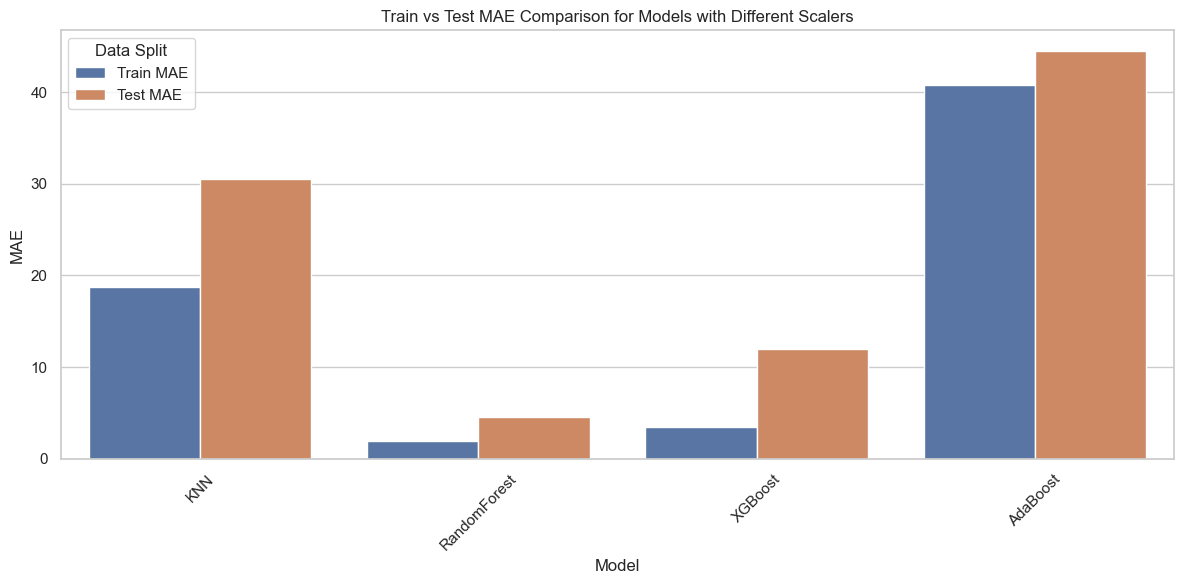

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot styles for better visualization
sns.set(style="whitegrid")

# Function to plot R² (Accuracy) comparison
def plot_accuracy_comparison(results_df):
    plt.figure(figsize=(12, 6))
    
    # Melt the DataFrame to make it long-format for seaborn's ease
    results_melted = results_df.melt(id_vars=['Scaler', 'Model'], value_vars=['Train R2', 'Test R2'], 
                                     var_name='Data Split', value_name='R2 Score')
    
    # Plot R² comparison using seaborn
    sns.barplot(x='Model', y='R2 Score', hue='Data Split', data=results_melted, ci=None)
    
    plt.title('Train vs Test R² Comparison for Models with Different Scalers')
    plt.ylabel('R² (Accuracy)')
    plt.xlabel('Model')
    plt.xticks(rotation=45)
    plt.legend(title="Data Split")
    plt.tight_layout()
    plt.show()

# Function to plot loss comparison
def plot_loss_comparison(results_df, loss_metric):
    plt.figure(figsize=(12, 6))

    # Loss can be MSE, RMSE, or MAE. We will plot train/test loss side by side.
    loss_columns = [f'Train {loss_metric}', f'Test {loss_metric}']

    # Melt the DataFrame for seaborn
    results_melted = results_df.melt(id_vars=['Scaler', 'Model'], value_vars=loss_columns, 
                                     var_name='Data Split', value_name=loss_metric)
    
    # Plot Loss comparison
    sns.barplot(x='Model', y=loss_metric, hue='Data Split', data=results_melted, ci=None)
    
    plt.title(f'Train vs Test {loss_metric} Comparison for Models with Different Scalers')
    plt.ylabel(loss_metric)
    plt.xlabel('Model')
    plt.xticks(rotation=45)
    plt.legend(title="Data Split")
    plt.tight_layout()
    plt.show()

# Plot R² (Accuracy) comparison
plot_accuracy_comparison(results)

# Plot MSE, RMSE, and MAE comparison
plot_loss_comparison(results, 'MSE')
plot_loss_comparison(results, 'RMSE')
plot_loss_comparison(results, 'MAE')


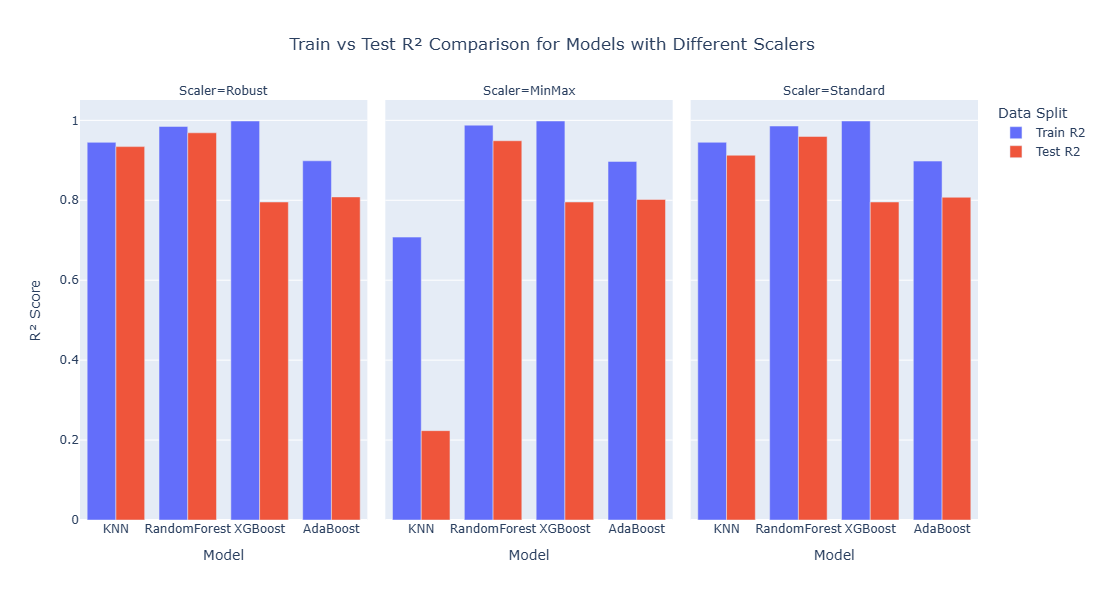

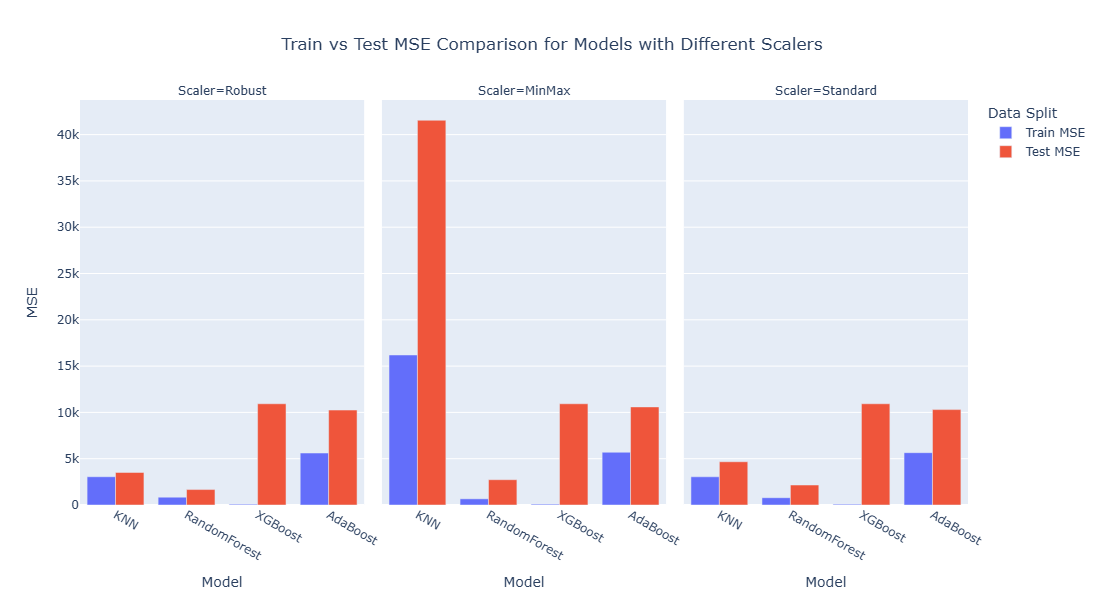

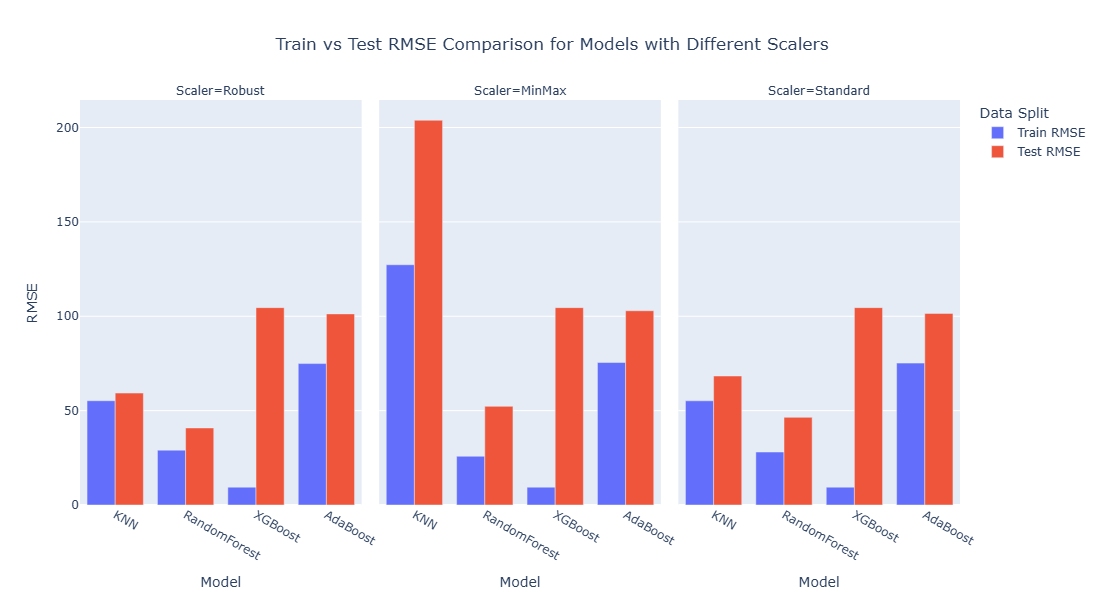

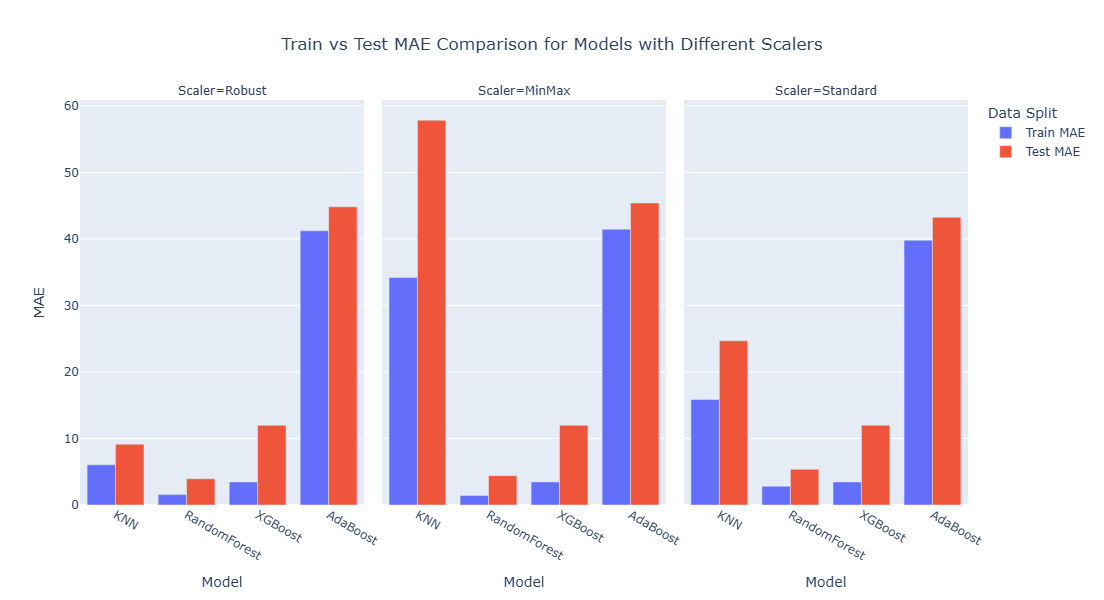

In [87]:
import plotly.express as px
import plotly.graph_objects as go

# Function to plot accuracy comparison (R²) using Plotly
def plot_accuracy_comparison_plotly(results_df):
    # Melt the DataFrame for Plotly
    results_melted = results_df.melt(id_vars=['Scaler', 'Model'], value_vars=['Train R2', 'Test R2'], 
                                     var_name='Data Split', value_name='R2 Score')

    # Create a bar plot for R² comparison
    fig = px.bar(results_melted, 
                 x='Model', 
                 y='R2 Score', 
                 color='Data Split', 
                 barmode='group',
                 facet_col='Scaler',
                 title='Train vs Test R² Comparison for Models with Different Scalers',
                 labels={'R2 Score': 'R² (Accuracy)'},
                 height=600)

    fig.update_layout(xaxis_title="Model", yaxis_title="R² Score", legend_title="Data Split", title_x=0.5)
    fig.show()

# Function to plot loss comparison (MSE, RMSE, MAE) using Plotly
def plot_loss_comparison_plotly(results_df, loss_metric):
    # Melt the DataFrame for Plotly
    loss_columns = [f'Train {loss_metric}', f'Test {loss_metric}']
    results_melted = results_df.melt(id_vars=['Scaler', 'Model'], value_vars=loss_columns, 
                                     var_name='Data Split', value_name=loss_metric)
    
    # Create a bar plot for Loss comparison
    fig = px.bar(results_melted, 
                 x='Model', 
                 y=loss_metric, 
                 color='Data Split', 
                 barmode='group',
                 facet_col='Scaler',
                 title=f'Train vs Test {loss_metric} Comparison for Models with Different Scalers',
                 labels={loss_metric: loss_metric},
                 height=600)

    fig.update_layout(xaxis_title="Model", yaxis_title=loss_metric, legend_title="Data Split", title_x=0.5)
    fig.show()

# Plot R² (Accuracy) comparison
plot_accuracy_comparison_plotly(results)

# Plot MSE, RMSE, and MAE comparisons
plot_loss_comparison_plotly(results, 'MSE')
plot_loss_comparison_plotly(results, 'RMSE')
plot_loss_comparison_plotly(results, 'MAE')
